# ***LOAN PREDICTION***

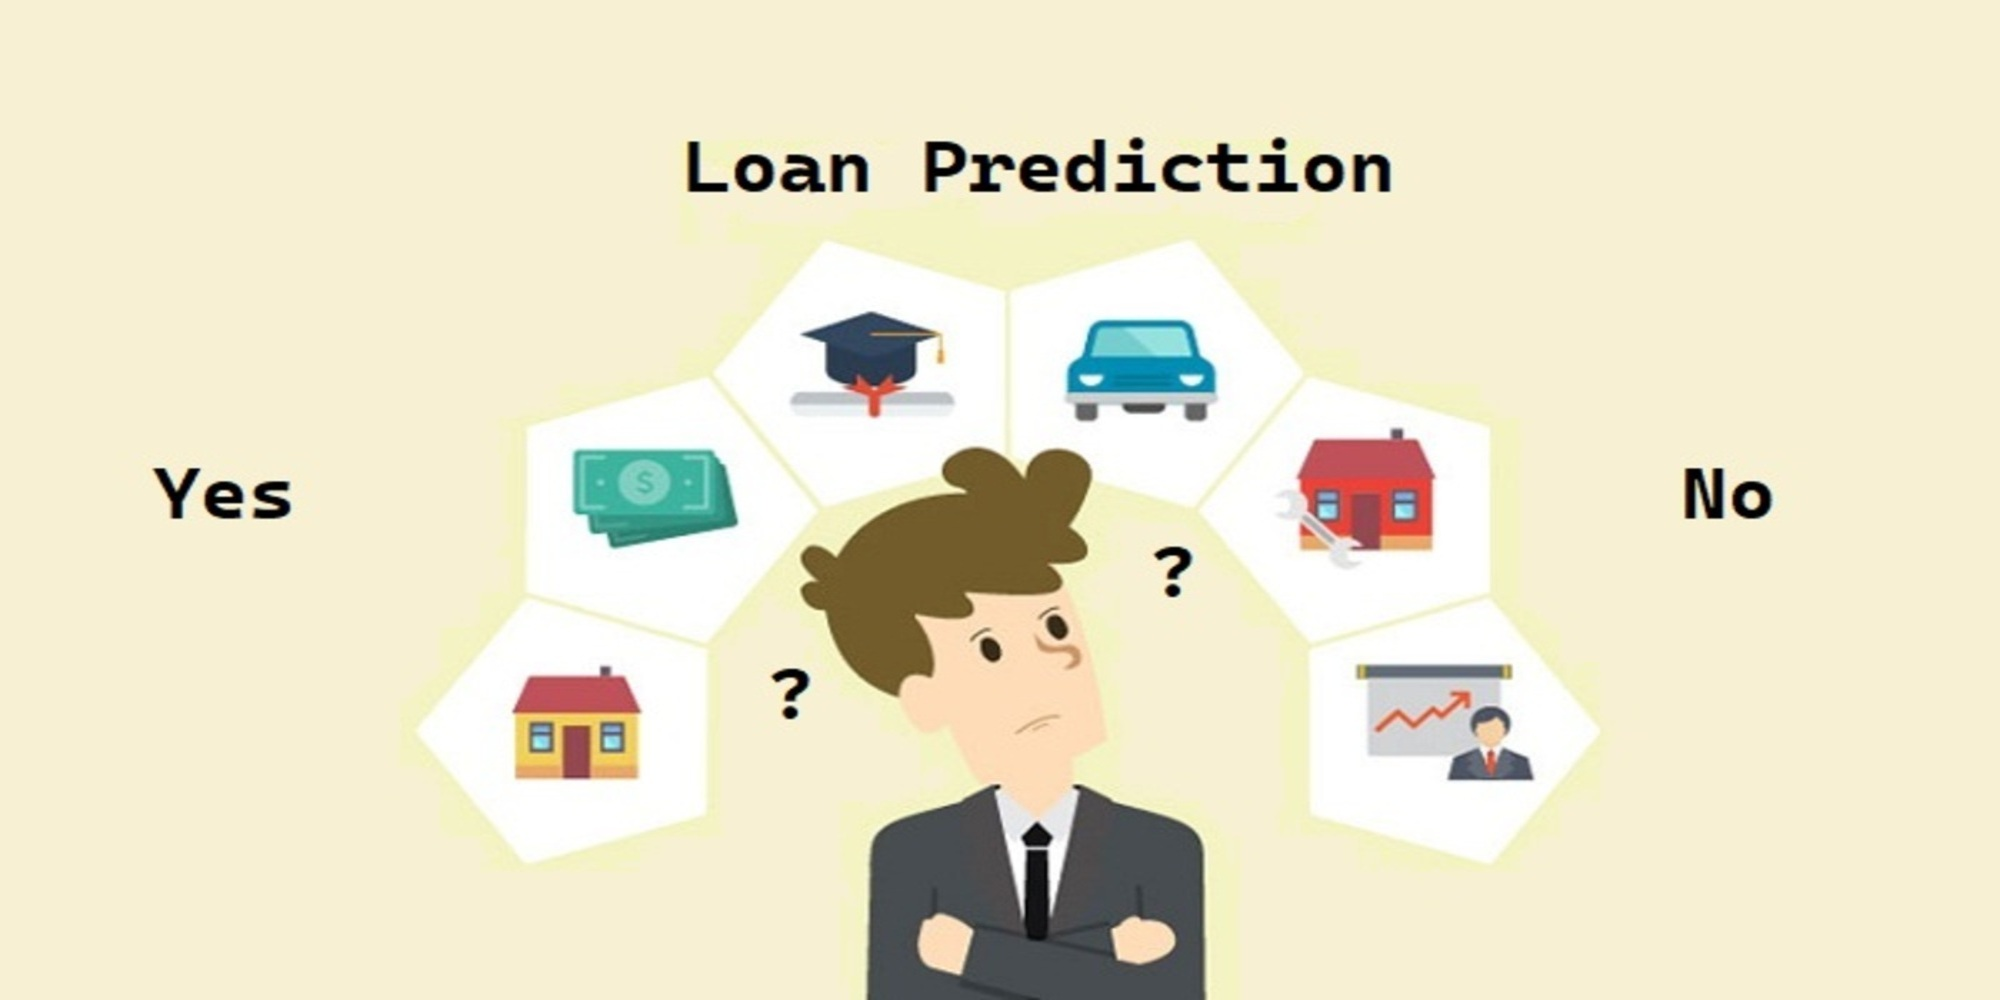

# Abstract
* Banks are making major part of profits through loans. Though lot of people are applying for loans. It’s hard to select the genuine applicant, who will repay the loan. While doing the process manually, lot of misconception may happen to select the genuine applicant. Therefore we are developing loan prediction system using machine learning, so the system automatically selects the eligible candidates. This is helpful to both bank staff and applicant. The time period for the sanction of loan will be drastically reduced. In this paper we are predicting the loan data by using some machine learning algorithms that are Logistic Regression &  Decision Tree.

# **Binary Classification :**
In this classification we have to predict either of the two given classes. For example: classifying the gender as male or female, predicting the result as win or loss, etc.

***Importing the libraries required***

In [ ]:
import pandas as pd                    # For analysing the data
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")


# Required libraries for modeling

In [ ]:

from sklearn.model_selection import cross_val_score,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from mlxtend.plotting import plot_decision_regions


***Data***

In [ ]:
# Mount Drive
from google.colab import drive
drive.mount('/content/drive')


# Read the train CSV file
train = pd.read_csv('/content/drive/MyDrive/loan.csv')
train.head()

Mounted at /content/drive


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Reading the test csv file
test = pd.read_csv('/content/drive/MyDrive/dba_projectfiles_march23_datafiels.zip (Unzipped Files)/loan_prediction_test.csv')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


***Copying the dataset in order to preserve the original one***

In [ ]:
train_original = train.copy()
test_original = test.copy()

***features present in the dataset***

In [ ]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

***Datatypes for each variables***

In [ ]:
train.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,int64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
train['Credit_History'].unique()

array([ 1.,  0., nan])

In [ ]:
# Changing the type of Credit_History from float to object(Discrete) in train dataset
train['Credit_History'] = train['Credit_History'].astype(object)

In [ ]:
print(train['Credit_History'].dtype)

object


In [ ]:
# Changing the type of Credit_History from float to object(Discrete) in test dataset
test['Credit_History'] = test['Credit_History'].astype(object)

In [ ]:
print(test['Credit_History'].dtype)

object


In [ ]:
train.shape,test.shape

((614, 13), (367, 12))

We have 614 rows and 13 columns in the train dataset and 367 rows and 12 columns in test dataset.

# ***Univariate Analysis***

We will first look at the target variable, i.e., Loan_Status. As it is a categorical variable, let us look at its frequency table, percentage distribution and bar plot.

Frequency table of a variable will give us the count of each category in that variable.

In [ ]:
train['Loan_Status'].value_counts()

,count
Loan_Status,
Y,422
N,192


Normalise can be set to true to print the proportions instead of Numbers.

In [ ]:
train['Loan_Status'].value_counts(normalize=True)

,proportion
Loan_Status,
Y,0.687296
N,0.312704


<Axes: xlabel='Loan_Status'>

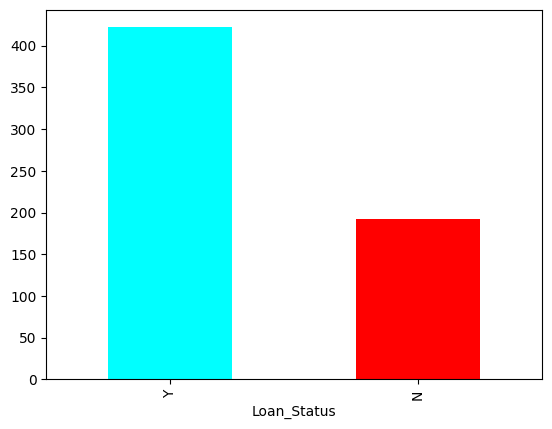

In [ ]:
train['Loan_Status'].value_counts().plot.bar(color=['cyan','red'])

The loan of 422(around 69%) people out of 614 was approved.

Now lets visualize each variable separately. Different types of variables are Categorical, ordinal and numerical.

*   **Categorical features:** These features have categories (Gender, Married,Self_Employed, Credit_History, Loan_Status)
*   **Ordinal features:** Variables in categorical features having some order involved (Dependents, Education, Property_Area)
*   **Numerical features:** These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)


Let’s visualize the categorical and ordinal features first.

<Axes: title={'center': 'Credit_History'}, xlabel='Credit_History'>

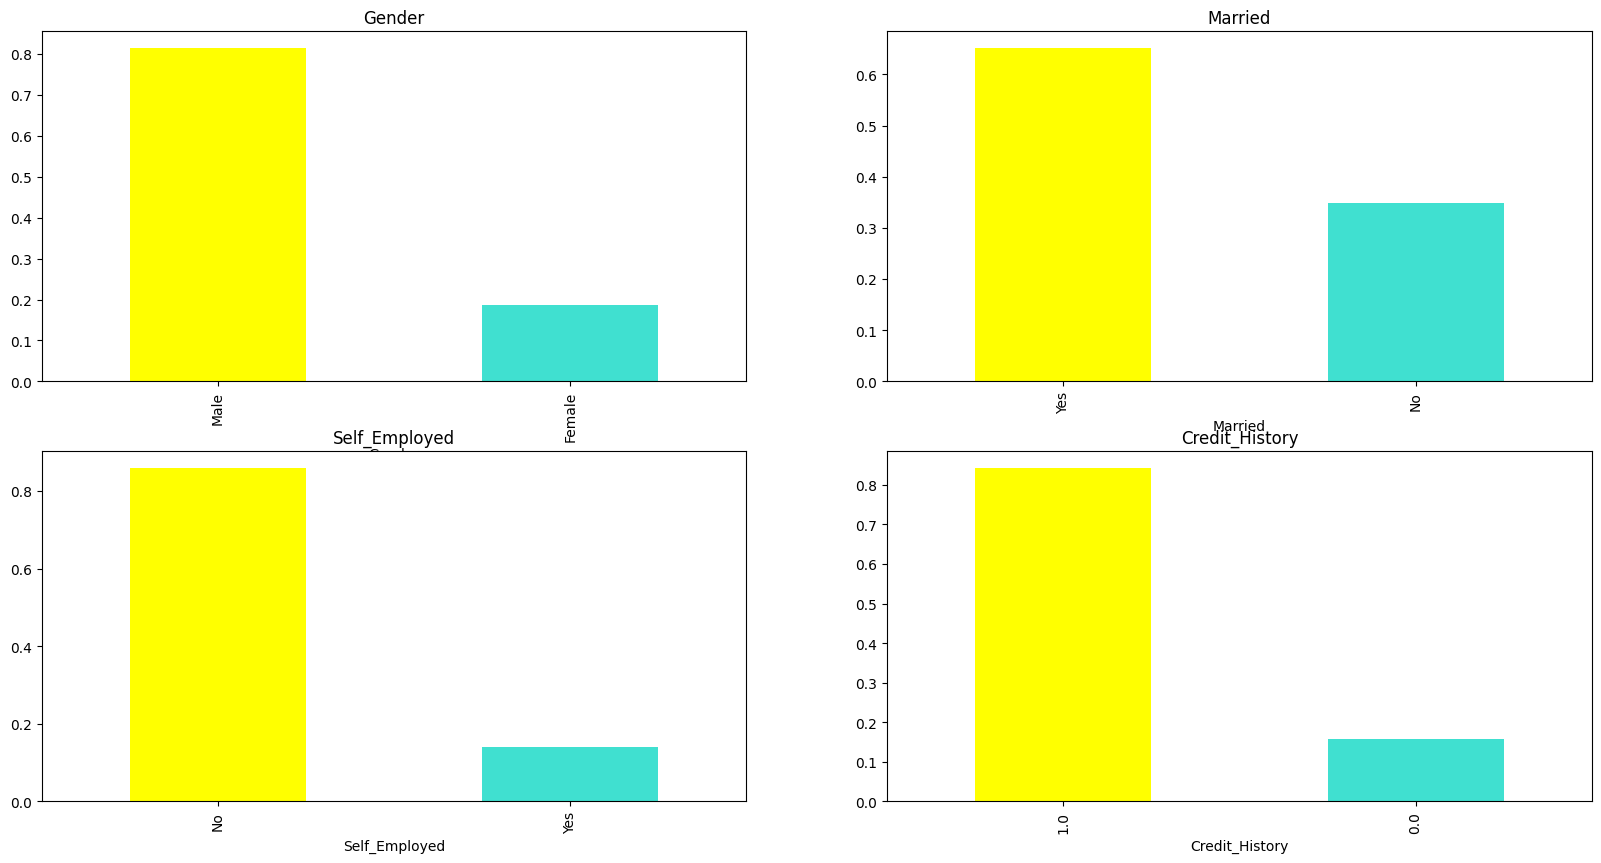

In [ ]:
plt.figure(1)
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender',color=['yellow','turquoise'])

plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Married',color=['yellow','turquoise'])

plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Self_Employed',color=['yellow','turquoise'])

plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Credit_History',color=['yellow','turquoise'])

It can be inferred from the above bar plots that:



*   80% applicants in the dataset are male.
*   Around 65% of the applicants in the dataset are married.
*   Around 15% applicants in the dataset are self employed.
*   Around 85% applicants have repaid their debts.

Now let’s visualize the ordinal variables.

<Axes: title={'center': 'Property_Area'}, xlabel='Property_Area'>

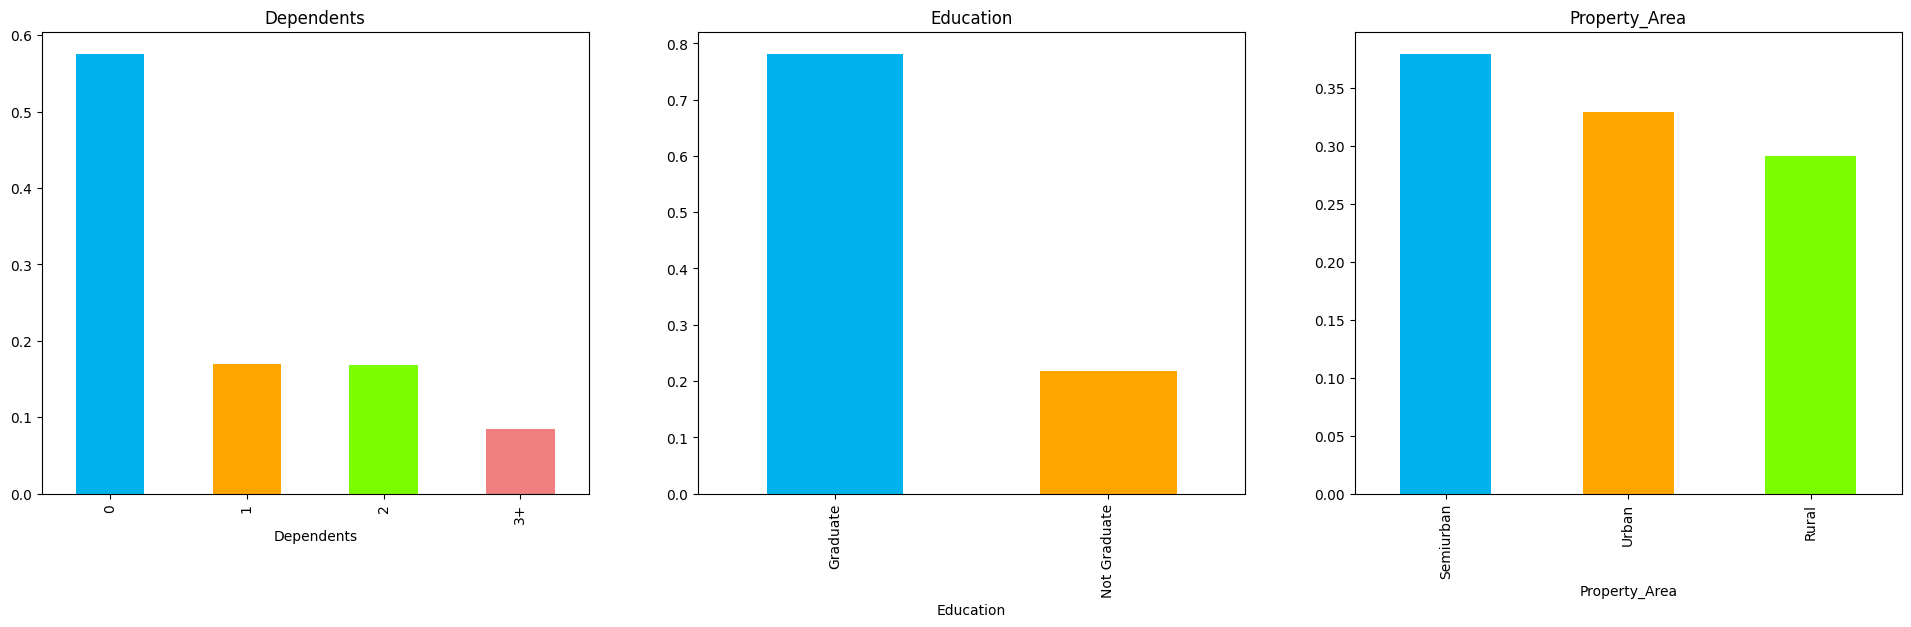

In [ ]:
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Dependents',color=['#00B2EE','orange','lawngreen','lightcoral'])

plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Education',color=['#00B2EE','orange'])

plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(figsize=(24,6),title='Property_Area',color=['#00B2EE','orange','lawngreen'])

Following inferences can be made from the above bar plots:

*   Most of the applicants don’t have any dependents.
*   Around 80% of the applicants are Graduate.
*   Most of the applicants are from Semiurban area.

Lets visualise Numerical data

In [ ]:
d0=train[(train["Dependents"] == "0") & (train["Loan_Status"] == "Y")].shape[0]
d1=train[(train["Dependents"] == "1") & (train["Loan_Status"] == "Y")].shape[0]
d2=train[(train["Dependents"] == "2") & (train["Loan_Status"] == "Y")].shape[0]
d3=train[(train["Dependents"] == "3+") & (train["Loan_Status"] == "Y")].shape[0]
d4=train[(train["Dependents"] == "0") & (train["Loan_Status"] == "N")].shape[0]
d5=train[(train["Dependents"] == "1") & (train["Loan_Status"] == "N")].shape[0]
d6=train[(train["Dependents"] == "2") & (train["Loan_Status"] == "N")].shape[0]
d7=train[(train["Dependents"] == "3+") & (train["Loan_Status"] == "N")].shape[0]
print("No. of people got loan approved with 0 dependents:",d0)
print("No. of people got loan approved with 1 dependent:",d1)
print("No. of people got loan approved with 2 dependents:",d2)
print("No. of people got loan approved with 3+ dependents:",d3)
print("No. of people did not get loan approval with 0 dependents:",d4)
print("No. of people did not get loan approval with 1 dependent:",d5)
print("No. of people did not get loan approval with 2 dependents:",d6)
print("No. of people did not get loan approval with 3+ dependents:",d7)

No. of people got loan approved with 0 dependents: 238
No. of people got loan approved with 1 dependent: 66
No. of people got loan approved with 2 dependents: 76
No. of people got loan approved with 3+ dependents: 33
No. of people did not get loan approval with 0 dependents: 107
No. of people did not get loan approval with 1 dependent: 36
No. of people did not get loan approval with 2 dependents: 25
No. of people did not get loan approval with 3+ dependents: 18


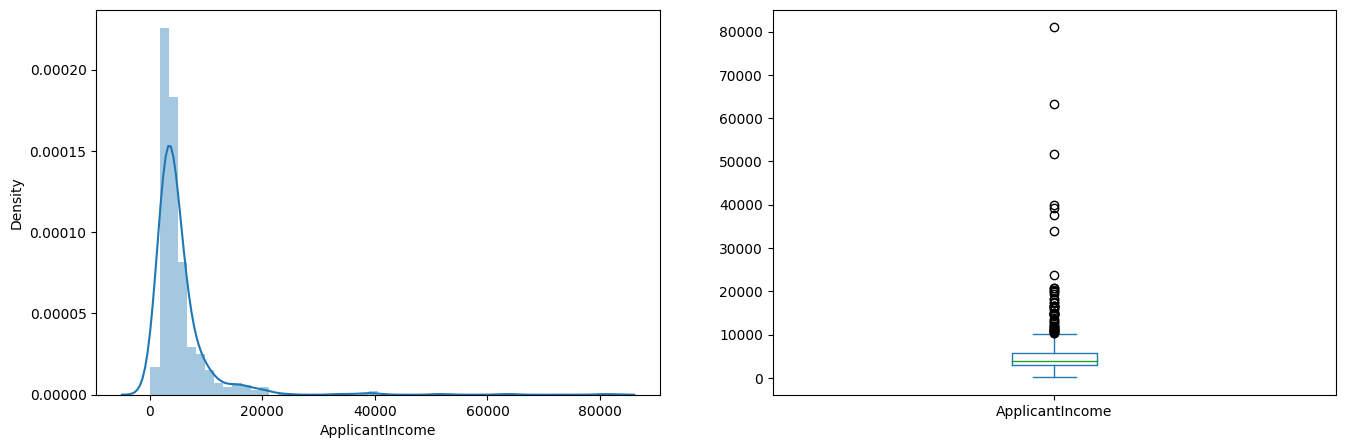

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels.

 Let us segregate them by Education:

Text(0.5, 0.98, '')

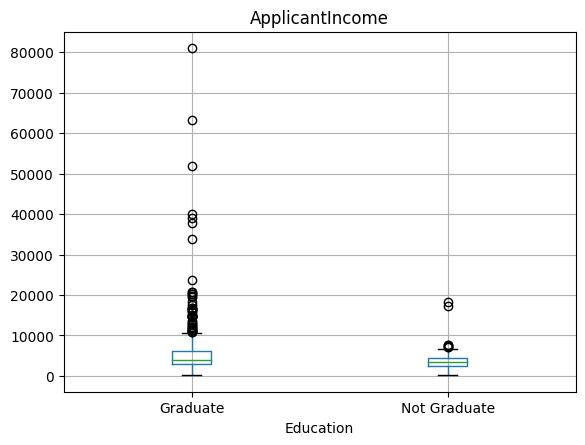

In [ ]:
train.boxplot(column='ApplicantIncome', by ='Education')
plt.suptitle('')

We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

Let’s look at the Coapplicant income distribution.

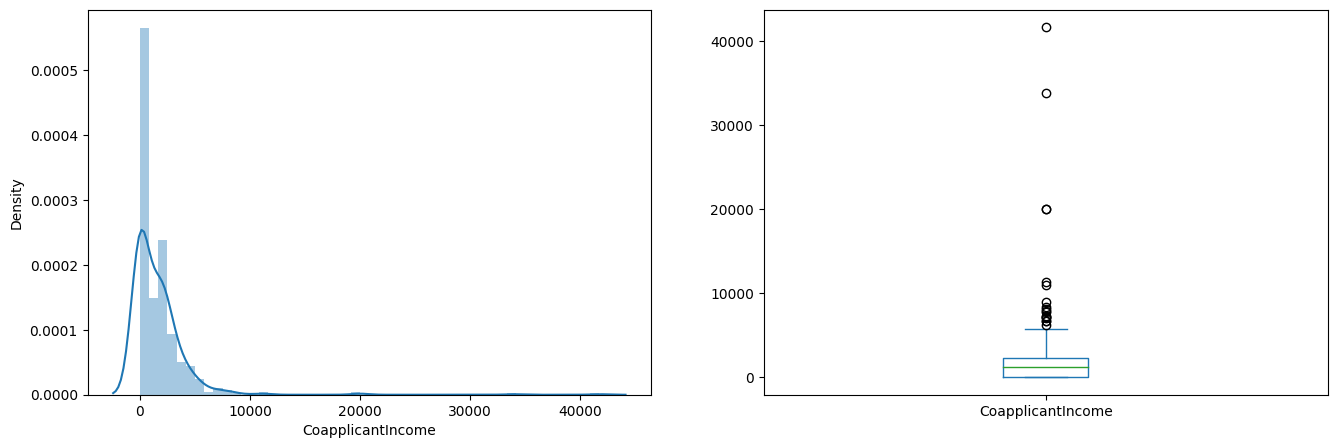

In [ ]:
plt.figure(1)
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box(figsize=(16,5))

plt.show()

We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers in the coapplicant income and it is not normally distributed.

Let’s look at the distribution of LoanAmount variable.

# **Bivariate Analysis**

## **Categorical Independent Variable vs Target Variable**

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.

In [ ]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,592.000000,600.00000
mean,5403.459283,1621.245798,146.412162,342.00000
std,6109.041673,2926.248369,85.587325,65.12041
min,150.000000,0.000000,9.000000,12.00000
25%,2877.500000,0.000000,100.000000,360.00000
50%,3812.500000,1188.500000,128.000000,360.00000
75%,5795.000000,2297.250000,168.000000,360.00000
max,81000.000000,41667.000000,700.000000,480.00000


In [ ]:
train.shape

(614, 13)

<Axes: xlabel='Gender'>

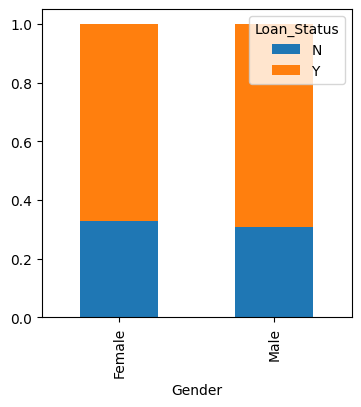

In [ ]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

Now let us visualize the remaining categorical variables vs target variable.

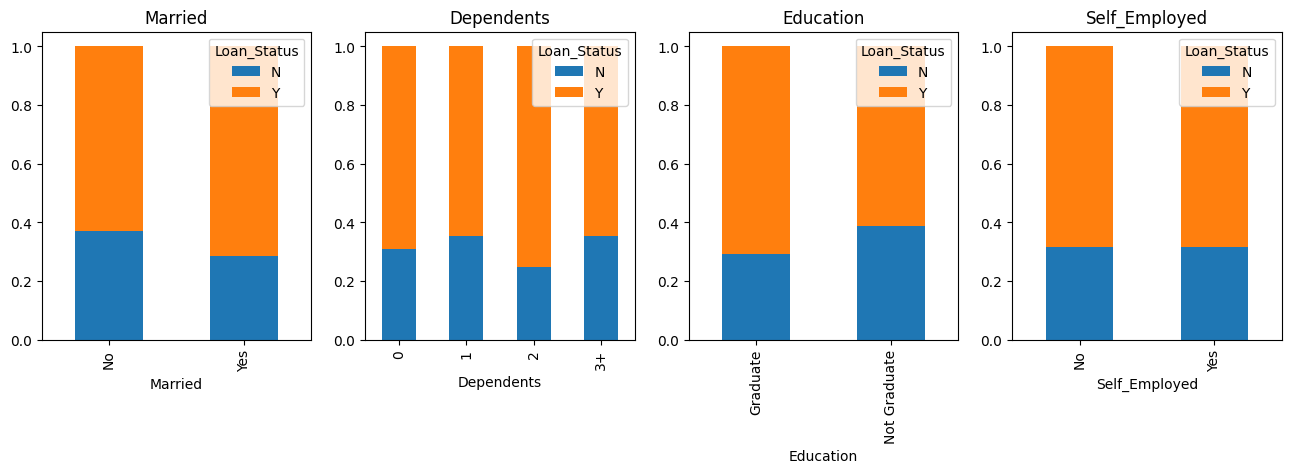

In [ ]:
import matplotlib.pyplot as plt

Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Married')

Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Dependents')

Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('Education')

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axs[3])
axs[3].set_title('Self_Employed')

plt.show()

*   Proportion of married applicants is higher for the approved loans.
*   Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
*   There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Now we will look at the relationship between remaining categorical independent variables and Loan_Status.

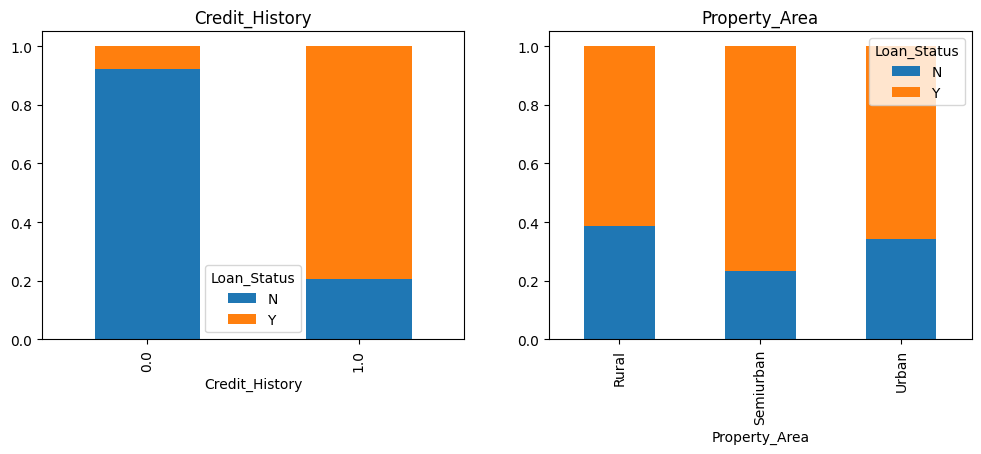

In [ ]:
Credit_History = pd.crosstab(train['Credit_History'], train['Loan_Status'])
Property_Area = pd.crosstab(train['Property_Area'], train['Loan_Status'])

fig, axs = plt.subplots(1, 2, figsize=(12, 4))

Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Credit_History')

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Property_Area')

plt.show()

*   It seems people with credit history as 1 are more likely to get their loans approved.
*   Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

Now let’s visualize numerical independent variables with respect to target variable.

In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


## **Numerical Independent Variable vs Target Variable**

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

Text(0, 0.5, 'ApplicantIncome')

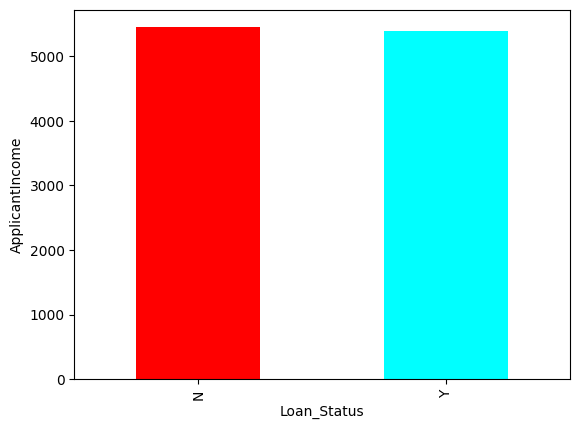

In [ ]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar(color=['red','cyan'])
plt.ylabel('ApplicantIncome')

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [ ]:
bins=[0,2500,4000,6000,81000]
group=['High','Average','Low', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,right=True,labels=group)

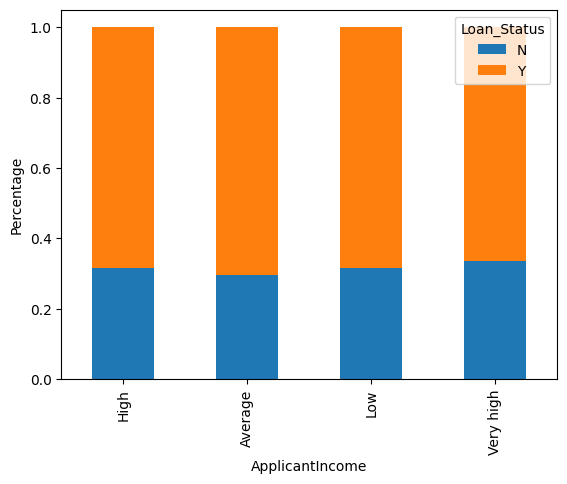

In [ ]:
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('ApplicantIncome')
P = plt.ylabel('Percentage')

It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar manner.

In [ ]:
bins=[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,include_lowest=True,labels=group)

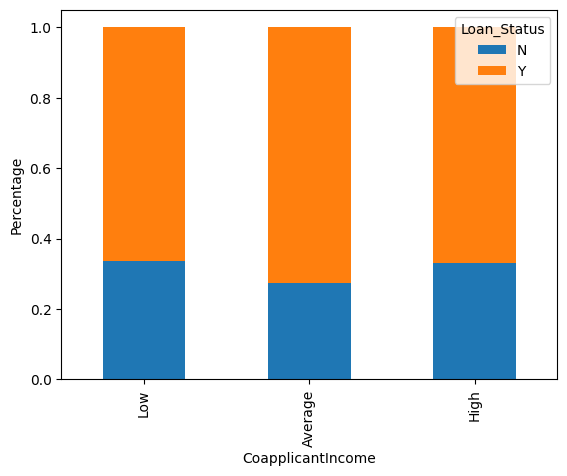

In [ ]:
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status'])
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.

In [ ]:
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']

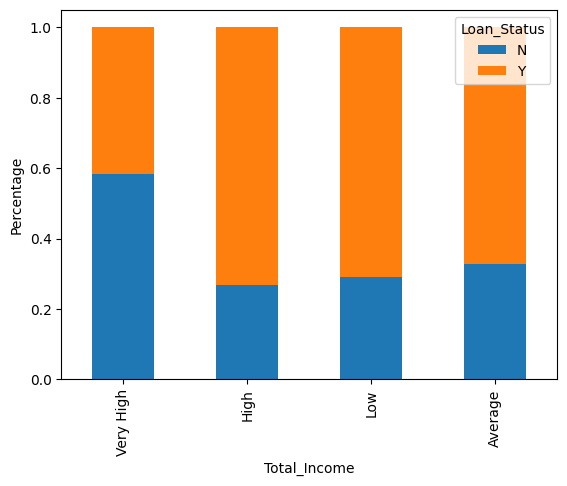

In [ ]:
bins=[0,2500,4000,6000,81000]
group=['Very High','High','Low', 'Average']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status'])
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('Total_Income')
P = plt.ylabel('Percentage')

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

Let’s visualize the Loan amount variable.

In [ ]:
bins=[0,100,200,700]
group=['Average','Low','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

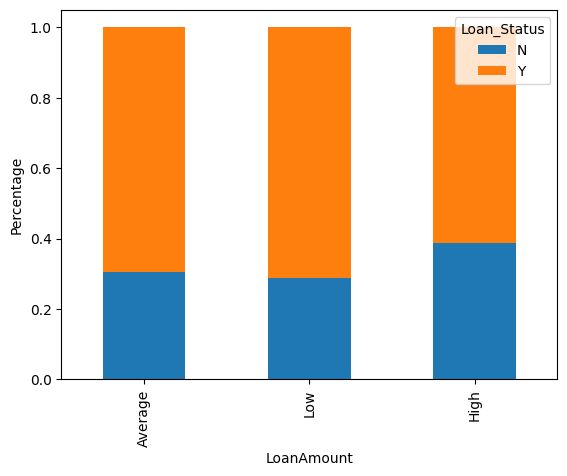

In [ ]:
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only numeric values as input. We will replace N with 0 and Y with 1.

In [ ]:
train.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Income_bin', 'Coapplicant_Income_bin', 'Total_Income',
       'Total_Income_bin', 'LoanAmount_bin'],
      dtype='object')

In [ ]:
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin'], axis=1)

In [ ]:
train=train.drop(['Total_Income'], axis=1)

Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status). LoanAmount is also correlated with CoapplicantIncome.

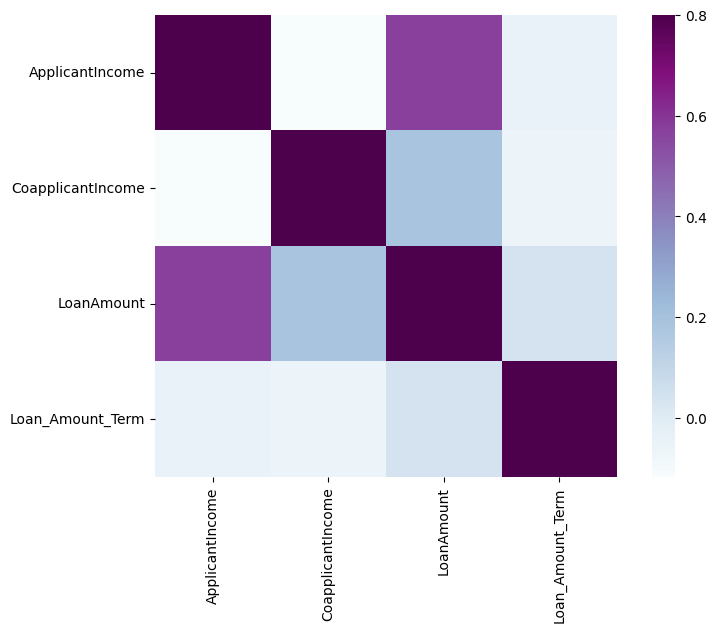

In [ ]:
matrix = train.corr(numeric_only=True) # Calculate correlation only for numeric columns
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");


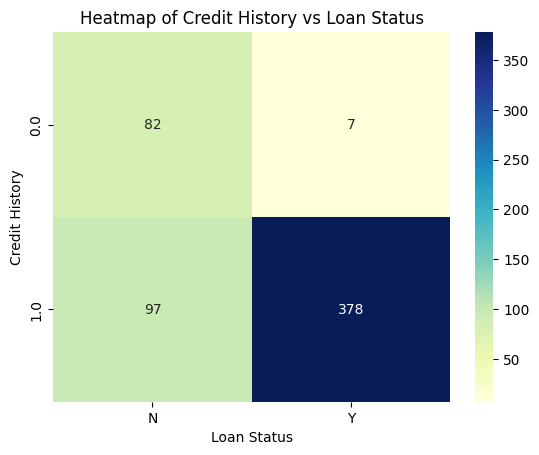

In [ ]:
crosstab = pd.crosstab(train['Credit_History'], train['Loan_Status'])
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Confusion Matrix of Credit History vs Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Credit History')
plt.show()

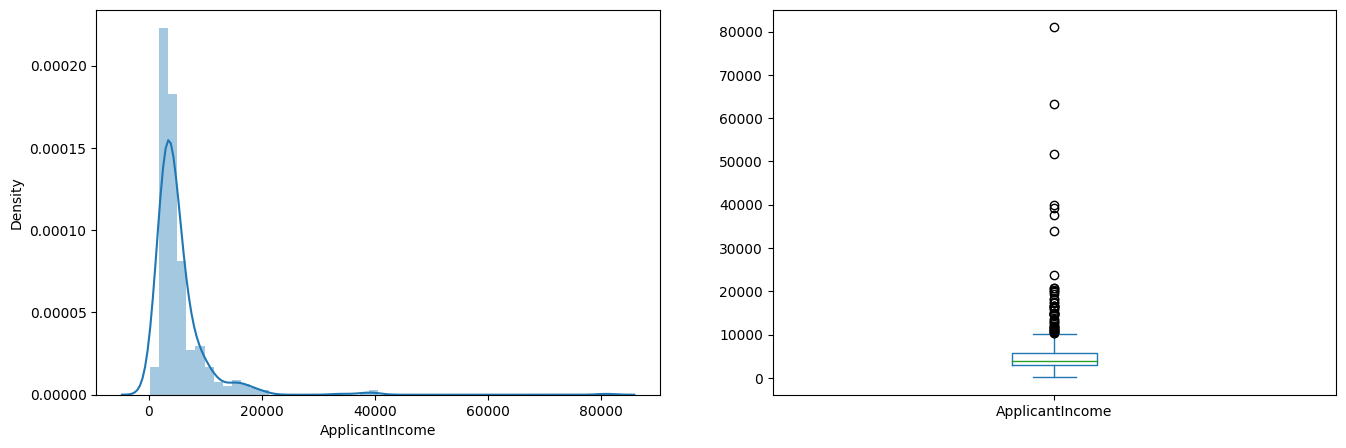

In [ ]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df['ApplicantIncome']);

plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5))

plt.show()

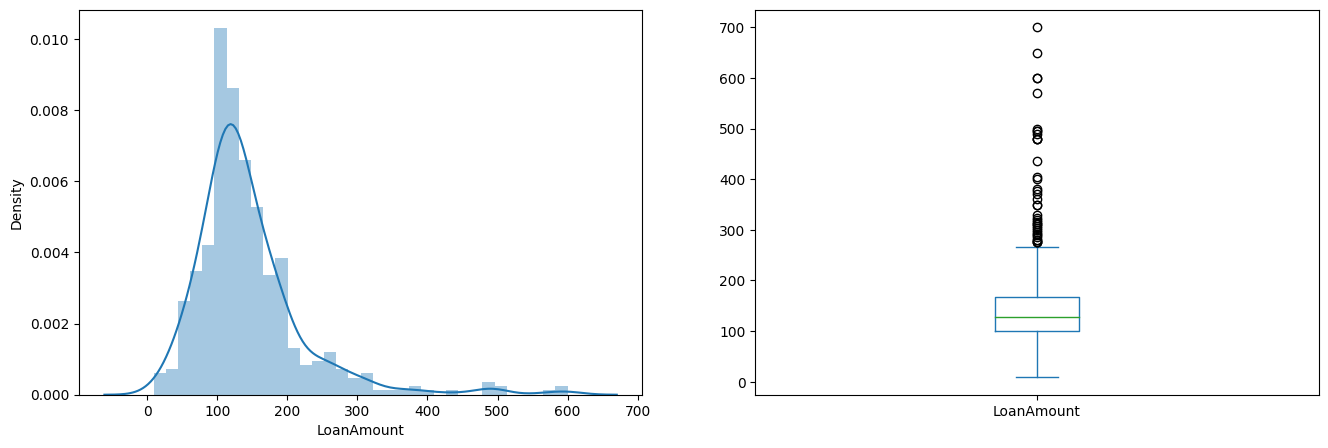

In [ ]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df['LoanAmount']);

plt.subplot(122)
train['LoanAmount'].plot.box(figsize=(16,5))

plt.show()

We see a lot of outliers in this variable and the distribution is fairly normal.
Now we  will treat the outliers.

# **Outlier Treatement**

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data.

Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. This is called right skewness. One way to remove the skewness is by doing the 'IQR method'. As we've performed IQR method, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution similar to normal distribution.


Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let’s build a logistic regression model and make predictions for the test dataset.

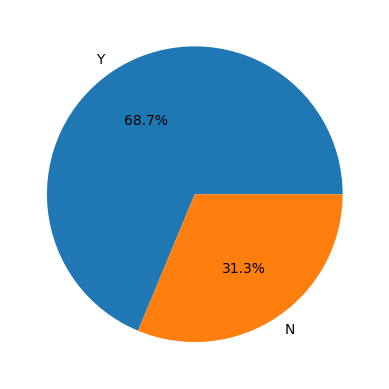

In [ ]:
temp = train['Loan_Status'].value_counts()
plt.pie(temp.values,
		labels=temp.index,
		autopct='%1.1f%%')
plt.show()

In [ ]:
# User defined function for detecting outliers using "IQR" method
def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                   # Interquartile range

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    outliers = df[column].values[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [ ]:
# Calling the function for showing the outliers present in LoanAmount
detect_outliers_iqr(train,'LoanAmount')

array([349., 315., 320., 286., 312., 370., 650., 290., 600., 275., 700.,
       495., 280., 279., 304., 330., 436., 480., 300., 376., 490., 308.,
       570., 380., 296., 275., 360., 405., 500., 480., 311., 480., 400.,
       324., 600., 275., 292., 350., 496.])

In [ ]:
# Calling the function for showing the outliers present in ApplicantIncome
detect_outliers_iqr(train,'ApplicantIncome')

array([12841, 12500, 11500, 10750, 13650, 11417, 14583, 10408, 23803,
       10513, 20166, 14999, 11757, 14866, 39999, 51763, 33846, 39147,
       12000, 11000, 16250, 14683, 11146, 14583, 20667, 20233, 15000,
       63337, 19730, 15759, 81000, 14880, 12876, 10416, 37719, 16692,
       16525, 16667, 10833, 18333, 17263, 20833, 13262, 17500, 11250,
       18165, 19484, 16666, 16120, 12000])

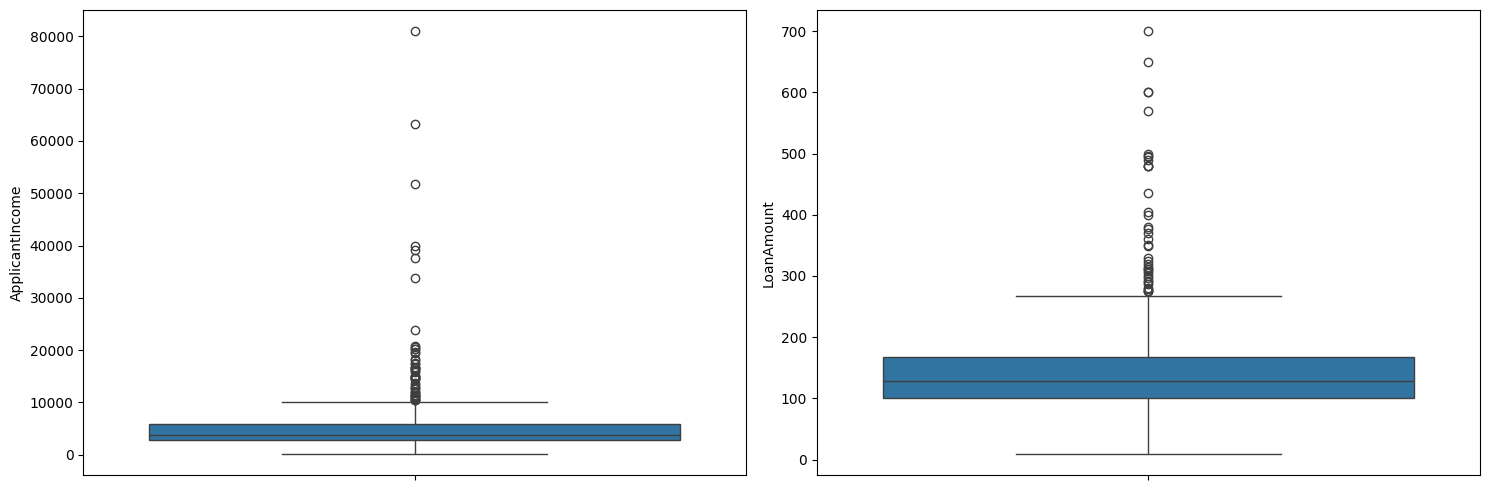

In [ ]:
# Visually representing the outliers present in the column "ApplicantIncome" & "LoanAmount" by Boxplot
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
	plt.subplot(1, 2, i+1)
	sns.boxplot(train[col])
plt.tight_layout()
plt.show()

In [ ]:
# User defined function to replace outliers
    ## It does a capping on the features so that the after caping above that Loan is approved
def replace_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # First quartile (25th percentile)
    Q3 = df[column].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                   # Interquartile range

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
    return df[column].values

In [ ]:
# Calling the function for replacing  the outliers present in ApplicantIncome
replace_outliers_iqr(train, 'ApplicantIncome')

array([ 5849.  ,  4583.  ,  3000.  ,  2583.  ,  6000.  ,  5417.  ,
        2333.  ,  3036.  ,  4006.  , 10171.25,  3200.  ,  2500.  ,
        3073.  ,  1853.  ,  1299.  ,  4950.  ,  3596.  ,  3510.  ,
        4887.  ,  2600.  ,  7660.  ,  5955.  ,  2600.  ,  3365.  ,
        3717.  ,  9560.  ,  2799.  ,  4226.  ,  1442.  ,  3750.  ,
        4166.  ,  3167.  ,  4692.  ,  3500.  , 10171.25,  2275.  ,
        1828.  ,  3667.  ,  4166.  ,  3748.  ,  3600.  ,  1800.  ,
        2400.  ,  3941.  ,  4695.  ,  3410.  ,  5649.  ,  5821.  ,
        2645.  ,  4000.  ,  1928.  ,  3086.  ,  4230.  ,  4616.  ,
       10171.25,  2708.  ,  2132.  ,  3366.  ,  8080.  ,  3357.  ,
        2500.  ,  3029.  ,  2609.  ,  4945.  ,  4166.  ,  5726.  ,
        3200.  , 10171.25,  7100.  ,  4300.  ,  3208.  ,  1875.  ,
        3500.  ,  4755.  ,  5266.  ,  3750.  ,  3750.  ,  1000.  ,
        3167.  ,  3333.  ,  3846.  ,  2395.  ,  1378.  ,  6000.  ,
        3988.  ,  2366.  ,  3333.  ,  2500.  ,  8566.  ,  5695

In [ ]:
# # Calling the function for replacing  the outliers present in LoanAmount
replace_outliers_iqr(train, 'LoanAmount')

array([ nan, 128.,  66., 120., 141., 267.,  95., 158., 168., 270.,  70.,
       109., 200., 114.,  17., 125., 100.,  76., 133., 115., 104., 270.,
       116., 112., 151., 191., 122., 110.,  35., 120., 201.,  74., 106.,
       114., 270.,  nan, 100., 144., 184., 110.,  80.,  47.,  75., 134.,
        96.,  88.,  44., 144., 120., 144., 100., 120., 112., 134., 270.,
        97.,  96., 135., 180., 144., 120.,  99., 165.,  nan, 116., 258.,
       126., 270., 125., 136., 172.,  97.,  81.,  95., 187., 113., 176.,
       110., 180., 130., 111.,  nan, 167., 265.,  50., 136.,  99., 104.,
       210., 175., 131., 188.,  81., 122.,  25.,  nan, 137.,  50., 115.,
       131., 133., 151.,  nan,  nan, 160., 100., 225., 120., 216.,  94.,
       136., 139., 152.,  nan, 118., 185., 154.,  85., 175., 259., 180.,
        44., 137.,  81., 194.,  93., 270.,  nan, 160., 182., 270.,  74.,
        70.,  25., 102., 270.,  84.,  88., 242., 129., 185., 168., 175.,
       122., 187., 100.,  70.,  30., 225., 125., 11

In [ ]:
# Now,showing that the outliers are perfectly replaced ApplicantIncome
detect_outliers_iqr(train,'ApplicantIncome')

array([], dtype=float64)

In [ ]:
# Now,showing that the outliers are perfectly replaced in LoanAmount
detect_outliers_iqr(train,'LoanAmount')

array([], dtype=float64)

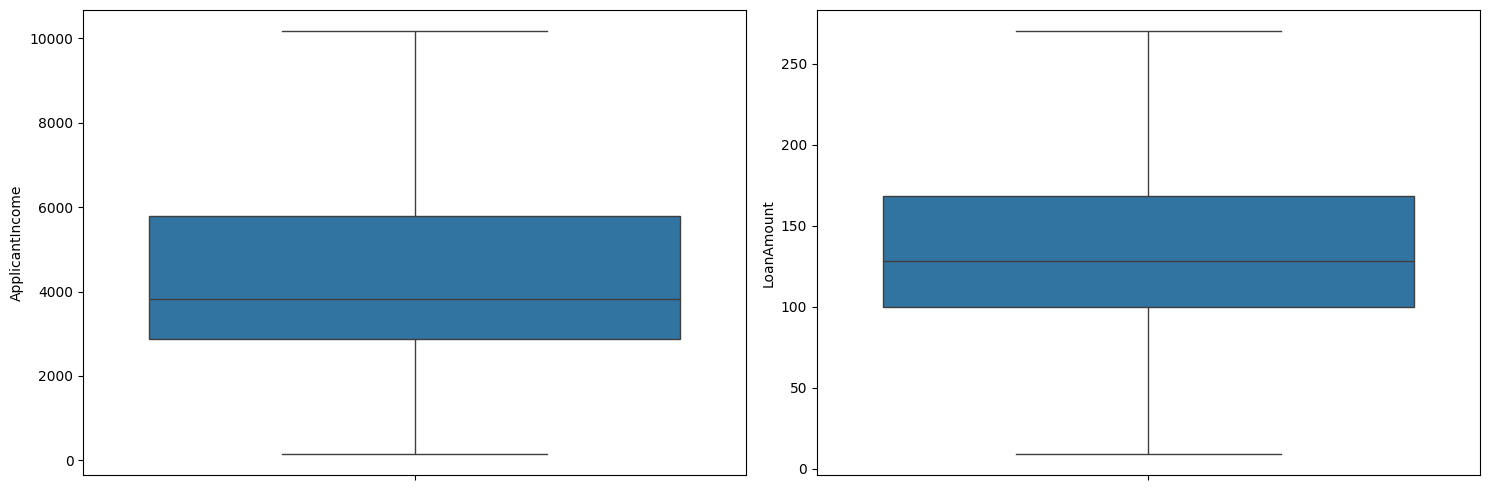

In [ ]:
# Boxplot after outlier treatment
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
	plt.subplot(1, 2, i+1)
	sns.boxplot(train[col])
plt.tight_layout()
plt.show()

In [ ]:
train.Gender.value_counts()

,count
Gender,
Male,489
Female,112


# **Missing Values Treatement**

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

Let’s list out feature-wise count of missing values.

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    float64
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    object 
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), object(9)
memory usage: 62.5+ KB


In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History features.

*   We will treat the missing values in all the features one by one.

*   We can consider these methods to fill the missing values:
                 1. For numerical variables: imputation using mean or median
                 2. For categorical variables: random choice method

In [ ]:
import random

In [ ]:
np.random.seed(42)

In [ ]:
value_counts = train['Gender'].value_counts(normalize=True)
value_counts

,proportion
Gender,
Male,0.813644
Female,0.186356


In [ ]:
train.dtypes

,0
Loan_ID,object
Gender,object
Married,object
Dependents,object
Education,object
Self_Employed,object
ApplicantIncome,float64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [ ]:
random_gender = random.choice(['Male','Female'])

In [ ]:
train["Gender"] = train["Gender"].fillna(pd.Series(random_gender,index=train.index))

In [ ]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [ ]:
train['Dependents'] = train['Dependents'].replace('3+', 3).astype(object)
random_dependent = random.choice([0,1,2,3])
train["Dependents"] = train["Dependents"].fillna(pd.Series(random_dependent,index=train.index))

In [ ]:
random_employed = random.choice(['Yes','No'])
train["Self_Employed"] = train["Self_Employed"].fillna(pd.Series(random_employed,index=train.index))

In [ ]:
random_married = random.choice(['Yes','No'])
train["Married"] = train["Married"].fillna(pd.Series(random_employed,index=train.index))

In [ ]:
train['Credit_History'].unique()

array([1.0, 0.0, nan], dtype=object)

In [ ]:
random_credit = random.choice(['1.0','0.0'])
train["Credit_History"] = train["Credit_History"].fillna(pd.Series(random_credit,index=train.index))

In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


Now let’s try to find a way to fill the missing values in Loan_Amount_Term. We will look at the value count of the Loan amount term variable.

In [ ]:
train['Loan_Amount_Term'].value_counts()

,count
Loan_Amount_Term,
360.0,512
180.0,44
480.0,15
300.0,13
240.0,4
84.0,4
120.0,3
60.0,2
36.0,2


It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [ ]:
train['Loan_Amount_Term'].median()

360.0

In [ ]:
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median(),inplace=True)

In [ ]:
train['LoanAmount'].median()

128.0

In [ ]:
train['LoanAmount'].mean()

138.28885135135135

In [ ]:
train['LoanAmount'].mode()

,LoanAmount
0,270.0


* Given that your median(128) and mode(120) are different from the mean (146), it suggests that your data might be skewed. Therefore, using the median would likely be the most robust choice.

In [ ]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)

In [ ]:
train.isnull().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


As we can see that all the missing values have been filled in the train dataset. Let’s fill all the missing values in the test dataset too with the same approach.

# **Model Building**

# **Logistic Regression**

Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1 / 0, Yes / No, True / False) given a set of independent variables. Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event. This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function

Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from imblearn.combine import SMOTETomek
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn.preprocessing import LabelEncoder
col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
le = LabelEncoder()

for i in col:
    # Convert all values in the column to strings before encoding
    train[i] = le.fit_transform(train[i].astype(str))

In [ ]:
train.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.00,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583.00,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.00,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.00,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.00,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417.00,4196.0,267.0,360.0,1.0,2,1
6,LP001013,1,1,0,1,0,2333.00,1516.0,95.0,360.0,1.0,2,1
7,LP001014,1,1,3,0,0,3036.00,2504.0,158.0,360.0,0.0,1,0
8,LP001018,1,1,2,0,0,4006.00,1526.0,168.0,360.0,1.0,2,1
9,LP001020,1,1,1,0,0,10171.25,10968.0,270.0,360.0,1.0,1,0


In [ ]:
#train.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [ ]:
X=train.iloc[0:614,1:12].values
y=train.iloc[0:614,12].values

In [ ]:
train.Loan_Status.value_counts()

,count
Loan_Status,
1,422
0,192


In [ ]:
#applying smote tomek
smt = SMOTETomek(random_state=42)
X_res, y_res = smt.fit_resample(X,y)

In [ ]:
pd.Series(y_res).value_counts()

,count
1,358
0,358


In [ ]:
y_res

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=0)

In [ ]:
model=LogisticRegression()
model.fit(X_train,y_train)
lr_prediction=model.predict(X_test)
print('Logistic Regression Accuracy=',metrics.accuracy_score(lr_prediction,y_test))

Logistic Regression Accuracy= 0.6604651162790698


Confusion Matrix:
[[54 56]
 [17 88]]


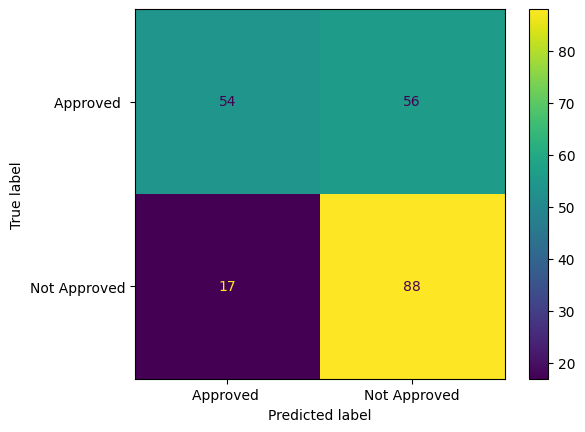

In [ ]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, lr_prediction)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Approved ","Not Approved"])
disp.plot()

In [ ]:
print("y_test",y_test)
print("y_prediction",lr_prediction)

y_test [1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 1
 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 0 1 0 0 0 0 1 1 1 0 0 0
 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0 1 1 1 0 1 0 1 1
 1 0 1 1 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1
 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0 1 1 1]
y_prediction [1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 0 1
 0 0 1 1 1 1 1 1 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 1 0 1
 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 0 1
 0 1 1 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 1
 0 1 0 1 1 0 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1]


In [ ]:
pd.Series(lr_prediction).value_counts()

,count
1,144
0,71


In [ ]:
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test,lr_prediction)

# Extract TP, TN, FP, FN from the confusion matrix
tp, fn, fp, tn = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print('Confusion Matrix:\n', cm)
print('Sensitivity (Recall):', sensitivity)
print('Specificity:', specificity)

Confusion Matrix:
 [[54 56]
 [17 88]]
Sensitivity (Recall): 0.4909090909090909
Specificity: 0.8380952380952381


# Decision Tree
* Decision tree is a type of supervised learning algorithm(having a pre-defined target variable) that is mostly used in classification problems. In this technique, we split the population or sample into two or more homogeneous sets(or sub-populations) based on most significant splitter / differentiator in input variables.

Decision trees use multiple algorithms to decide to split a node in two or more sub-nodes. The creation of sub-nodes increases the homogeneity of resultant sub-nodes. In other words, we can say that purity of the node increases with respect to the target variable.

In [ ]:
train = train.drop(['Loan_ID'],axis=1)

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)



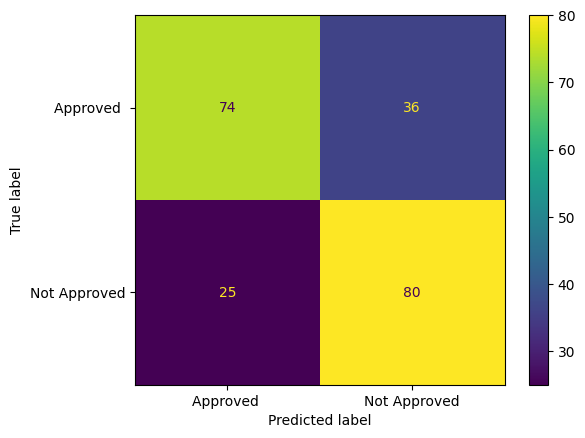

In [ ]:
predictions = clf_dt.predict(X_test)
cm = confusion_matrix(y_test, predictions, labels=clf_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Approved ","Not Approved"])
disp.plot()

In [ ]:
from sklearn.metrics import confusion_matrix

# Create the confusion matrix
cm = confusion_matrix(y_test,predictions)

# Extract TP, TN, FP, FN from the confusion matrix
tp, fn, fp, tn = cm.ravel()

# Calculate sensitivity and specificity
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

print('Confusion Matrix:\n', cm)
print('Sensitivity (Recall):', sensitivity)
print('Specificity:', specificity)

Confusion Matrix:
 [[74 36]
 [25 80]]
Sensitivity (Recall): 0.6727272727272727
Specificity: 0.7619047619047619


In [ ]:
## Decision Tree
model_2 = DecisionTreeClassifier()
model_2.fit(X_train,y_train)
y_pred_model2 = model_2.predict(X_test)
accuracy = accuracy_score(y_test,y_pred_model2)
accuracy*100

71.62790697674419

In [ ]:
from sklearn.tree import plot_tree

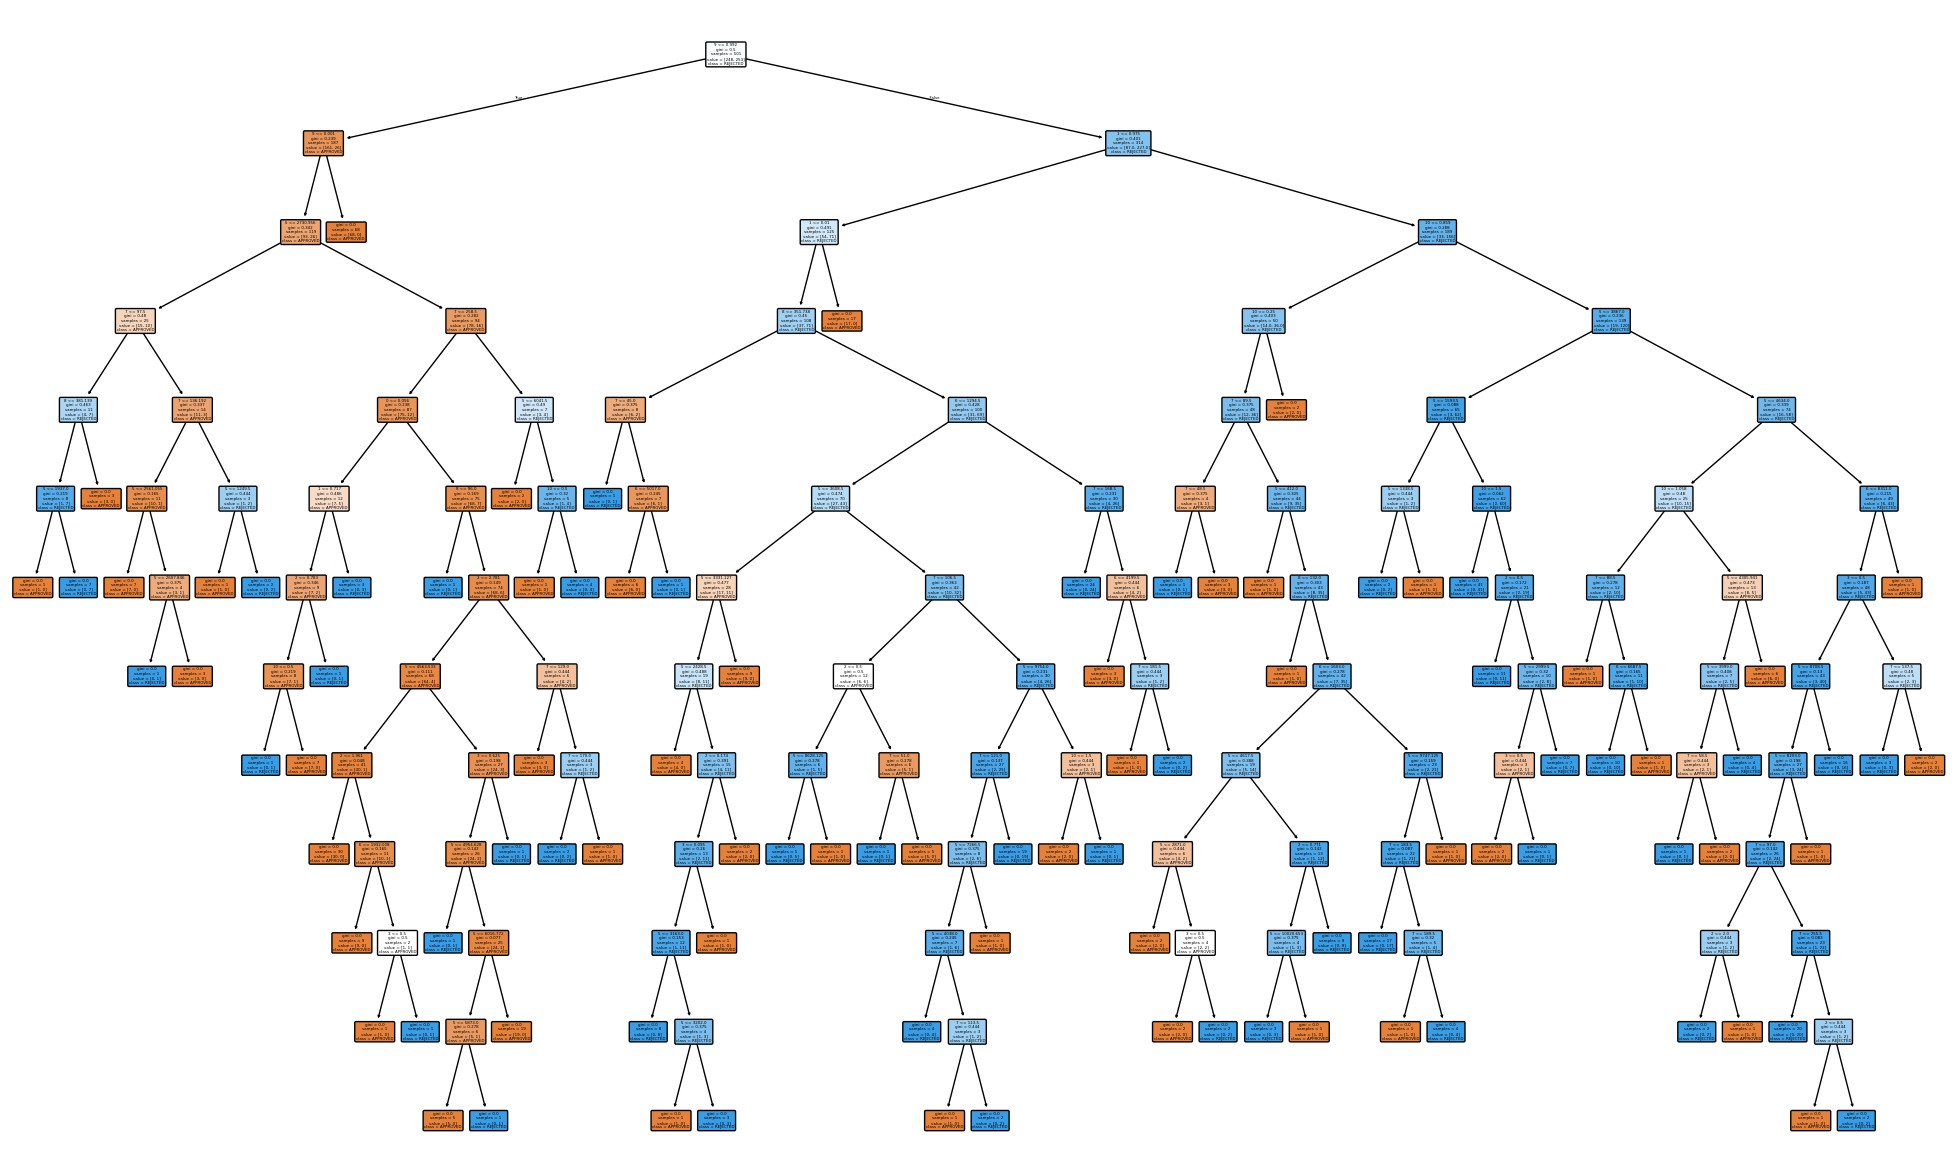

In [ ]:
plt.figure(figsize=(25, 15))
plot_tree(clf_dt,
          filled = True,
          rounded = True,
          class_names=["APPROVED","REJECTED"],
          feature_names=pd.DataFrame(X_train).columns
          )
plt.show()

# Missing values and Outlier treatment on test data

In [ ]:
test.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,5
Loan_Amount_Term,6


In [ ]:
detect_outliers_iqr(test,'ApplicantIncome')

array([13633, 12173,  9226, 72529,  8449, 13518,  9719, 12500, 32000,
       10890, 12941,  8703, 15312, 10166,  9167, 13083, 10000,  8706,
       14911, 10000, 18840, 24797, 29167,  9000, 10000,  8750, 14987,
       16000,  9699,  8667,  8550,  9200])

In [ ]:
detect_outliers_iqr(test,'LoanAmount')

array([280., 300., 290., 275., 360., 257., 390., 256., 300., 550., 260.,
       336., 412., 460., 297., 300., 260., 254.])

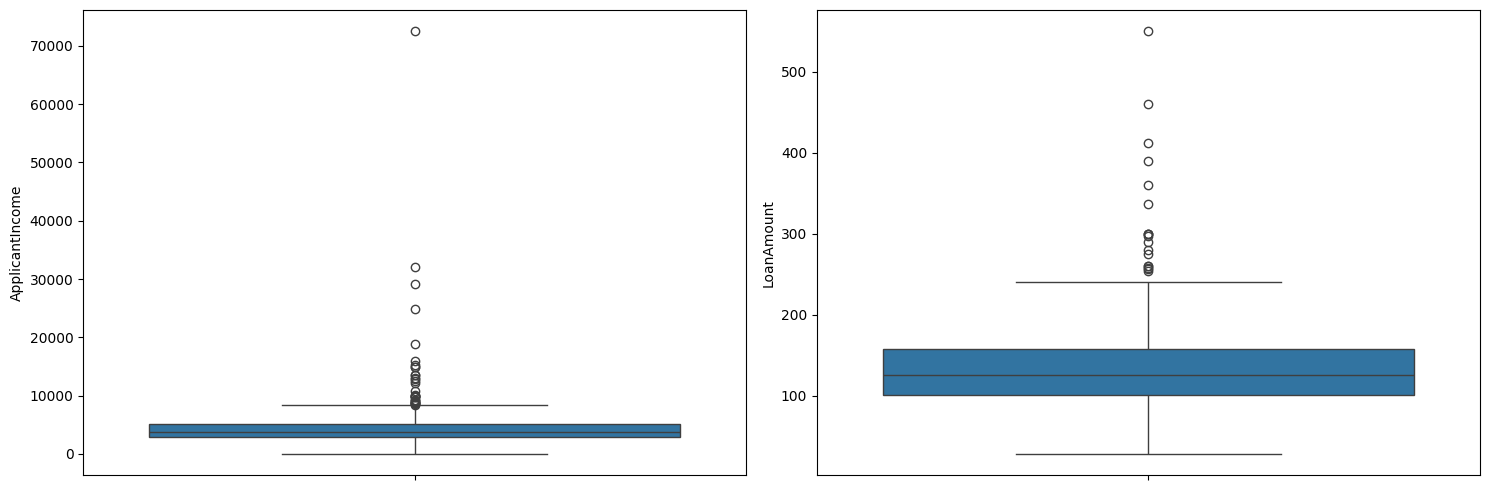

In [ ]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
	plt.subplot(1, 2, i+1)
	sns.boxplot(test[col])
plt.tight_layout()
plt.show()

In [ ]:
replace_outliers_iqr(test, 'ApplicantIncome')

array([5720., 3076., 5000., 2340., 3276., 2165., 2226., 3881., 8354.,
       2400., 3091., 2185., 4166., 8354., 4666., 5667., 4583., 3786.,
       8354., 1300., 1888., 2083., 3909., 3765., 5400.,    0., 4363.,
       7500., 3772., 2942., 2478., 6250., 3268., 2783., 2740., 3150.,
       7350., 2267., 5833., 3643., 5629., 3644., 1750., 6500., 3666.,
       4260., 4163., 2356., 6792., 8000., 2419., 3500., 3500., 4116.,
       5293., 2750., 4402., 3613., 2779., 4720., 2415., 7016., 4968.,
       2101., 4490., 2917., 4700., 3445., 7666., 2458., 3250., 4463.,
       4083., 3900., 4750., 3583., 3189., 6356., 3413., 7950., 3829.,
       8354., 4136., 8354., 4456., 4635., 3571., 3066., 3235., 5058.,
       3188., 8354., 4364., 4766., 4609., 6260., 3333., 3500., 8354.,
       6835., 4452., 2262., 3901., 2687., 2243., 3417., 1596., 4513.,
       4500., 4523., 4742., 4082., 3417., 2922., 4167., 4243.,    0.,
       1516., 1762.,  724., 3125., 2333., 3350., 2500., 8354., 4667.,
       6500., 7500.,

In [ ]:
replace_outliers_iqr(test, 'LoanAmount')

array([110.   , 126.   , 208.   , 100.   ,  78.   , 152.   ,  59.   ,
       147.   , 244.625, 123.   ,  90.   , 162.   ,  40.   , 166.   ,
       124.   , 131.   , 200.   , 126.   , 244.625, 100.   ,  48.   ,
        28.   , 101.   , 125.   , 244.625, 148.   , 140.   , 244.625,
        57.   , 125.   ,  75.   , 192.   , 152.   , 158.   , 101.   ,
       176.   , 185.   ,  90.   , 116.   , 138.   , 100.   , 110.   ,
        90.   , 200.   ,  84.   , 185.   , 162.   , 108.   , 187.   ,
       187.   , 124.   , 120.   , 160.   ,  30.   ,  92.   , 130.   ,
       130.   , 134.   , 176.   ,  90.   , 110.   , 125.   , 189.   ,
       108.   , 125.   , 138.   , 135.   , 130.   , 187.   , 188.   ,
        95.   ,  65.   , 139.   , 232.   , 144.   , 155.   , 186.   ,
        50.   ,     nan, 185.   , 163.   , 244.625, 149.   , 244.625,
       131.   , 102.   , 135.   ,  95.   ,  77.   , 200.   , 130.   ,
       244.625, 185.   , 100.   , 123.   , 110.   , 244.625, 140.   ,
        61.   , 188.

In [ ]:
detect_outliers_iqr(test,'ApplicantIncome')

array([], dtype=float64)

In [ ]:
detect_outliers_iqr(test,'LoanAmount')

array([], dtype=float64)

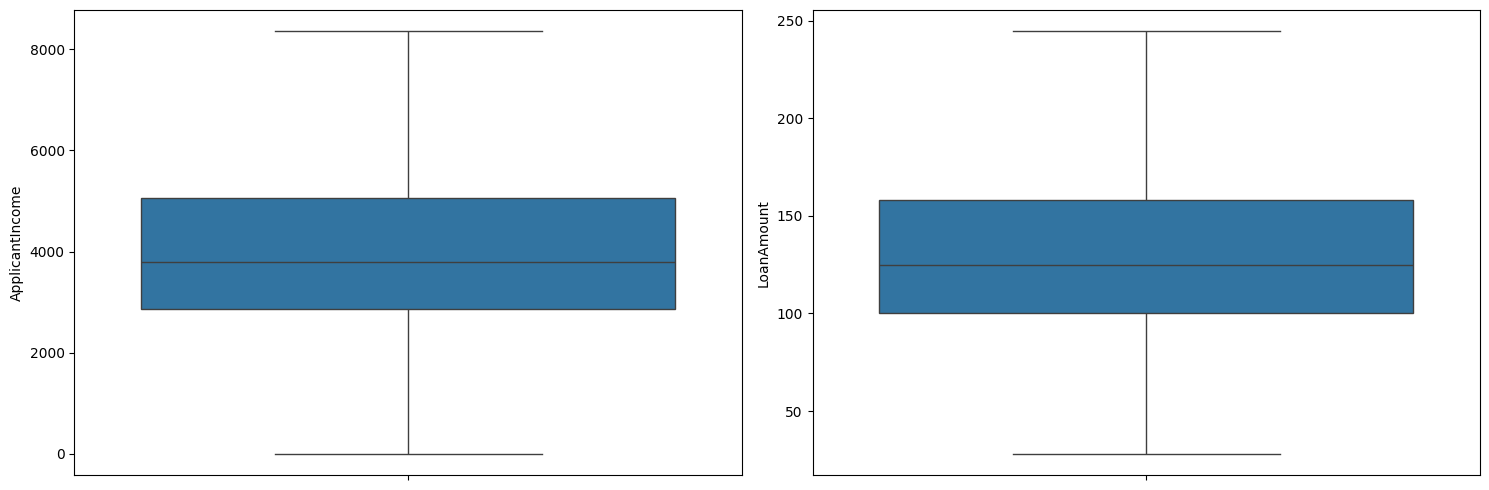

In [ ]:
plt.subplots(figsize=(15, 5))
for i, col in enumerate(['ApplicantIncome', 'LoanAmount']):
	plt.subplot(1, 2, i+1)
	sns.boxplot(test[col])
plt.tight_layout()
plt.show()

In [ ]:
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].median())

In [ ]:
value_counts = test['Gender'].value_counts(normalize=True)
value_counts

,proportion
Gender,
Male,0.803371
Female,0.196629


In [ ]:
test.isnull().sum()

,0
Loan_ID,0
Gender,11
Married,0
Dependents,10
Education,0
Self_Employed,23
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,6


In [ ]:
random.seed(42)

In [ ]:
random_gender0 = random.choice(['Male','Female'])

In [ ]:
test["Gender"] = test["Gender"].fillna(pd.Series(random_gender0,index=test.index))

In [ ]:
test['Credit_History'].unique()

array([1.0, nan, 0.0], dtype=object)

In [ ]:
test['Dependents'] = test['Dependents'].replace('3+', 3).astype(object)

In [ ]:
random_dependent1 = random.choice([0,1,2,3])
test["Dependents"] = test["Dependents"].fillna(pd.Series(random_dependent1,index=test.index))

In [ ]:
random_employed2 = random.choice(['Yes','No'])
test["Self_Employed"] = test["Self_Employed"].fillna(pd.Series(random_employed2,index=test.index))

In [ ]:
random_credit3 = random.choice(['1.0','0.0'])
test["Credit_History"] = test["Credit_History"].fillna(pd.Series(random_credit3,index=test.index))

In [ ]:
test['Loan_Amount_Term'].mean()

342.53739612188366

In [ ]:
test['Loan_Amount_Term'].median()

360.0

In [ ]:
test['Loan_Amount_Term'].mode()

,Loan_Amount_Term
0,360.0


In [ ]:
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median(),inplace=True)

In [ ]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,367.0,4238.964578,1950.976357,0.0,2864.0,3786.0,5060.0,8354.000
CoapplicantIncome,367.0,1569.577657,2334.232099,0.0,0.0,1025.0,2430.5,24000.000
LoanAmount,367.0,132.074251,47.202708,28.0,101.0,125.0,157.5,244.625
Loan_Amount_Term,367.0,342.822888,64.658402,6.0,360.0,360.0,360.0,480.000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    float64
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    object 
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(1), object(8)
memory usage: 37.3+ KB


In [ ]:
correlation1=test.ApplicantIncome.corr(test.LoanAmount)
print(correlation1)

0.4605966831474091


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720.0,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076.0,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000.0,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340.0,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276.0,0,78.0,360.0,1.0,Urban


In [ ]:
from sklearn.preprocessing import LabelEncoder
col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
le = LabelEncoder()

for i in col:
    # Convert all values in the column to strings before encoding
    test[i] = le.fit_transform(test[i].astype(str))

In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720.0,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076.0,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000.0,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340.0,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276.0,0,78.0,360.0,1.0,2


#As I am getting high accuracy when using Decision Tree
## So, I've used Decision Tree model for predicting test data .


In [ ]:
train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849.0,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583.0,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000.0,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583.0,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000.0,0.0,141.0,360.0,1.0,2,1


In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,0,0,5720.0,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,0,0,3076.0,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,0,0,5000.0,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,0,0,2340.0,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,1,0,3276.0,0,78.0,360.0,1.0,2


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    int64  
 2   Married            367 non-null    int64  
 3   Dependents         367 non-null    int64  
 4   Education          367 non-null    int64  
 5   Self_Employed      367 non-null    int64  
 6   ApplicantIncome    367 non-null    float64
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    object 
 11  Property_Area      367 non-null    int64  
dtypes: float64(3), int64(7), object(2)
memory usage: 37.3+ KB


In [ ]:
train.keys()

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [ ]:
test.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [ ]:
X_train0=train.iloc[0:614,0:11].values
y_train0=train.iloc[0:614,11].values

In [ ]:
X_train1=df.iloc[0:614,0:11].values
y_train1=df.iloc[0:614,11].values

In [ ]:
X_res1, y_res1 = smt.fit_resample(X_train0,y_train0)

In [ ]:
pd.Series(y_res1).value_counts()

,count
1,359
0,359


In [ ]:
X_test1=test.iloc[0:367,1:12].values

In [ ]:
#test.drop(['Loan_ID'],axis=1,inplace=True)

In [ ]:
X_test0=test.iloc[0:367,1:12].values

In [ ]:
model_p = DecisionTreeClassifier()

In [ ]:
model_p.fit(X_res1, y_res1)

DecisionTreeClassifier()

In [ ]:
predictions = model_p.predict(X_test0)

In [ ]:
predictions

array([1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,

In [ ]:
predictions.shape

(367,)

In [ ]:
pd.Series(predictions).value_counts()

,count
1,261
0,106


In [ ]:
# Creating a new  feature which  named " Loan_Status" and storing the prediction part in it
test['Loan_Status'] = predictions

In [ ]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,0,0,5720.0,0,110.0,360.0,1.0,2,1
1,LP001022,1,1,1,0,0,3076.0,1500,126.0,360.0,1.0,2,1
2,LP001031,1,1,2,0,0,5000.0,1800,208.0,360.0,1.0,2,1
3,LP001035,1,1,2,0,0,2340.0,2546,100.0,360.0,1.0,2,1
4,LP001051,1,0,0,1,0,3276.0,0,78.0,360.0,1.0,2,0


# Charts on test dataset

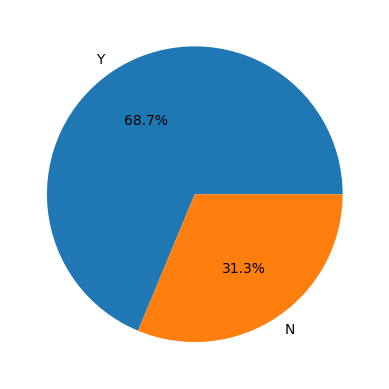

In [ ]:
temp1 = test['Loan_Status'].value_counts()
plt.pie(temp.values,
		labels=temp.index,
		autopct='%1.1f%%')
plt.show()

In [ ]:
value_counts = test['Gender'].value_counts(normalize=True)
value_counts

,proportion
Gender,
1,0.809264
0,0.190736


<Axes: xlabel='Gender'>

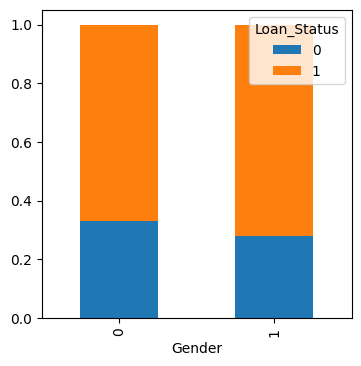

In [ ]:
Gender=pd.crosstab(test['Gender'],test['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

We can infer from the above plot that there is no major difference between approval and rejection in Gender as it is approximately same.

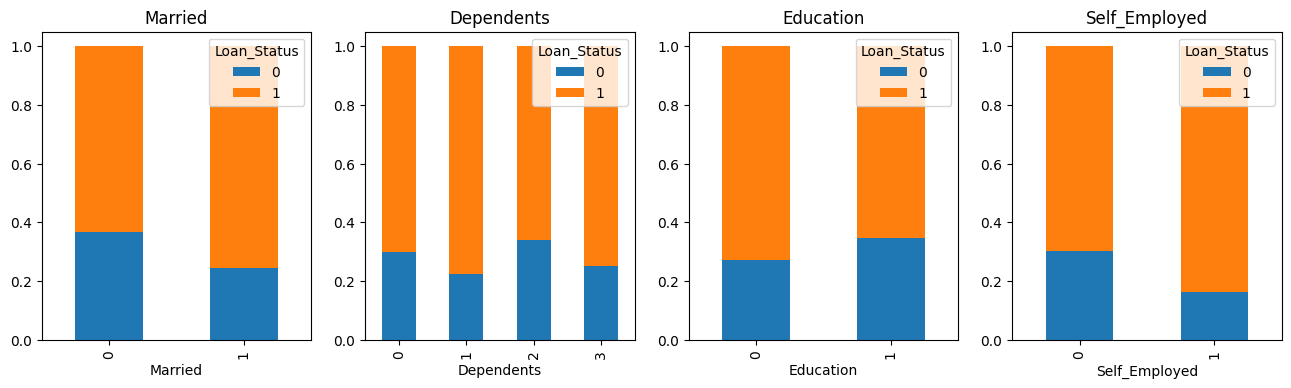

In [ ]:
import matplotlib.pyplot as plt

Married = pd.crosstab(test['Married'],test['Loan_Status'])
Dependents = pd.crosstab(test['Dependents'],test['Loan_Status'])
Education = pd.crosstab(test['Education'],test['Loan_Status'])
Self_Employed = pd.crosstab(test['Self_Employed'],test['Loan_Status'])

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, ax=axs[0])
axs[0].set_title('Married')

Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar', stacked=True, ax=axs[1])
axs[1].set_title('Dependents')

Education.div(Education.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axs[2])
axs[2].set_title('Education')

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axs[3])
axs[3].set_title('Self_Employed')

plt.show()

* From Married -- We can infer that Married loan approval rate is higher than that of unmarried.
* From Dependents -- We can infer that The approval rate of Dependents 1 & 3 approximately same but the Dependents with 0 has less approval rate of loan than that of 1 & 3 and at last the Dependents with 2 has very less chance of loan approval than that of 0,1 & 3.

0 -- Graduate
1 -- Not Graduate
* From Education -- We can infer that Graduated are getting more loan approved than that of not Graduated.    
* From Self_Emplyed -- We can infer that the person those are not self employed are getting less loan approval when compared with self employed.

In [ ]:
test.head(50)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001015,1,1,0,0,0,5720.0,0,110.000,360.0,1.0,2,1
1,LP001022,1,1,1,0,0,3076.0,1500,126.000,360.0,1.0,2,1
2,LP001031,1,1,2,0,0,5000.0,1800,208.000,360.0,1.0,2,1
3,LP001035,1,1,2,0,0,2340.0,2546,100.000,360.0,1.0,2,1
4,LP001051,1,0,0,1,0,3276.0,0,78.000,360.0,1.0,2,0
5,LP001054,1,1,0,1,1,2165.0,3422,152.000,360.0,1.0,2,1
6,LP001055,0,0,1,1,0,2226.0,0,59.000,360.0,1.0,1,0
7,LP001056,1,1,2,1,0,3881.0,0,147.000,360.0,0.0,0,0
8,LP001059,1,1,2,0,0,8354.0,0,244.625,240.0,1.0,2,0
9,LP001067,1,0,0,1,0,2400.0,2400,123.000,360.0,1.0,1,1


<Axes: xlabel='Property_Area', ylabel='count'>

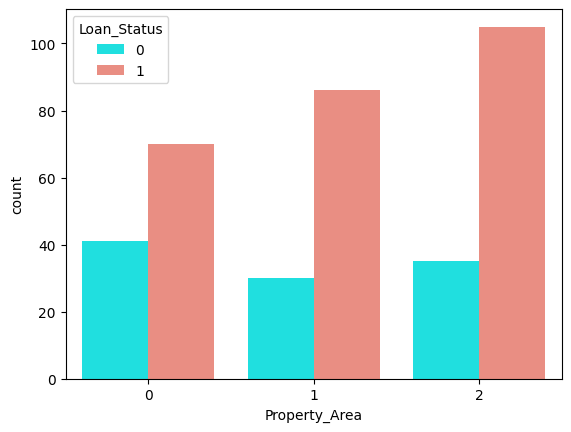

In [ ]:
sns.countplot(x='Property_Area',hue='Loan_Status',data=test,palette={0:'cyan',1:'salmon'})

<Axes: xlabel='Credit_History', ylabel='count'>

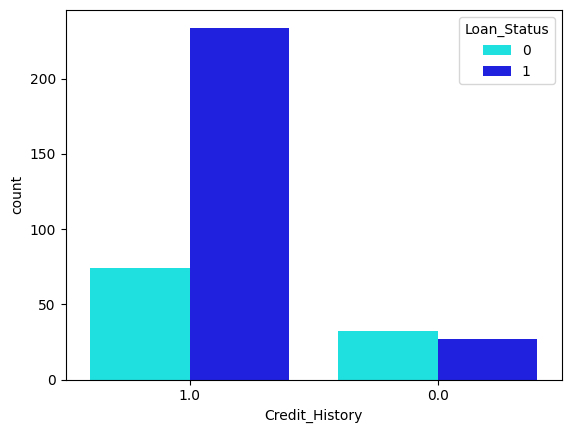

In [ ]:
sns.countplot(x='Credit_History',hue='Loan_Status',data=test,palette=['cyan','blue'])

# Pruning

In [ ]:
X=train[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']]
y=train[['Loan_Status']]

In [ ]:
X = pd.get_dummies(X, columns=['Dependents','Property_Area'])

In [ ]:
train.Loan_Status.value_counts()

,count
Loan_Status,
1,422
0,192


In [ ]:
X_res1, y_res1 = smt.fit_resample(X,y)

In [ ]:
X_train1,X_test1,y_train1,y_test1=train_test_split(X_res1,y_res1,test_size=0.3,random_state=0)

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train1, y_train1)

In [ ]:
clf_dt.score(X_train1,y_train1)

1.0

In [ ]:
clf_dt.score(X_test1,y_test1)

0.728110599078341

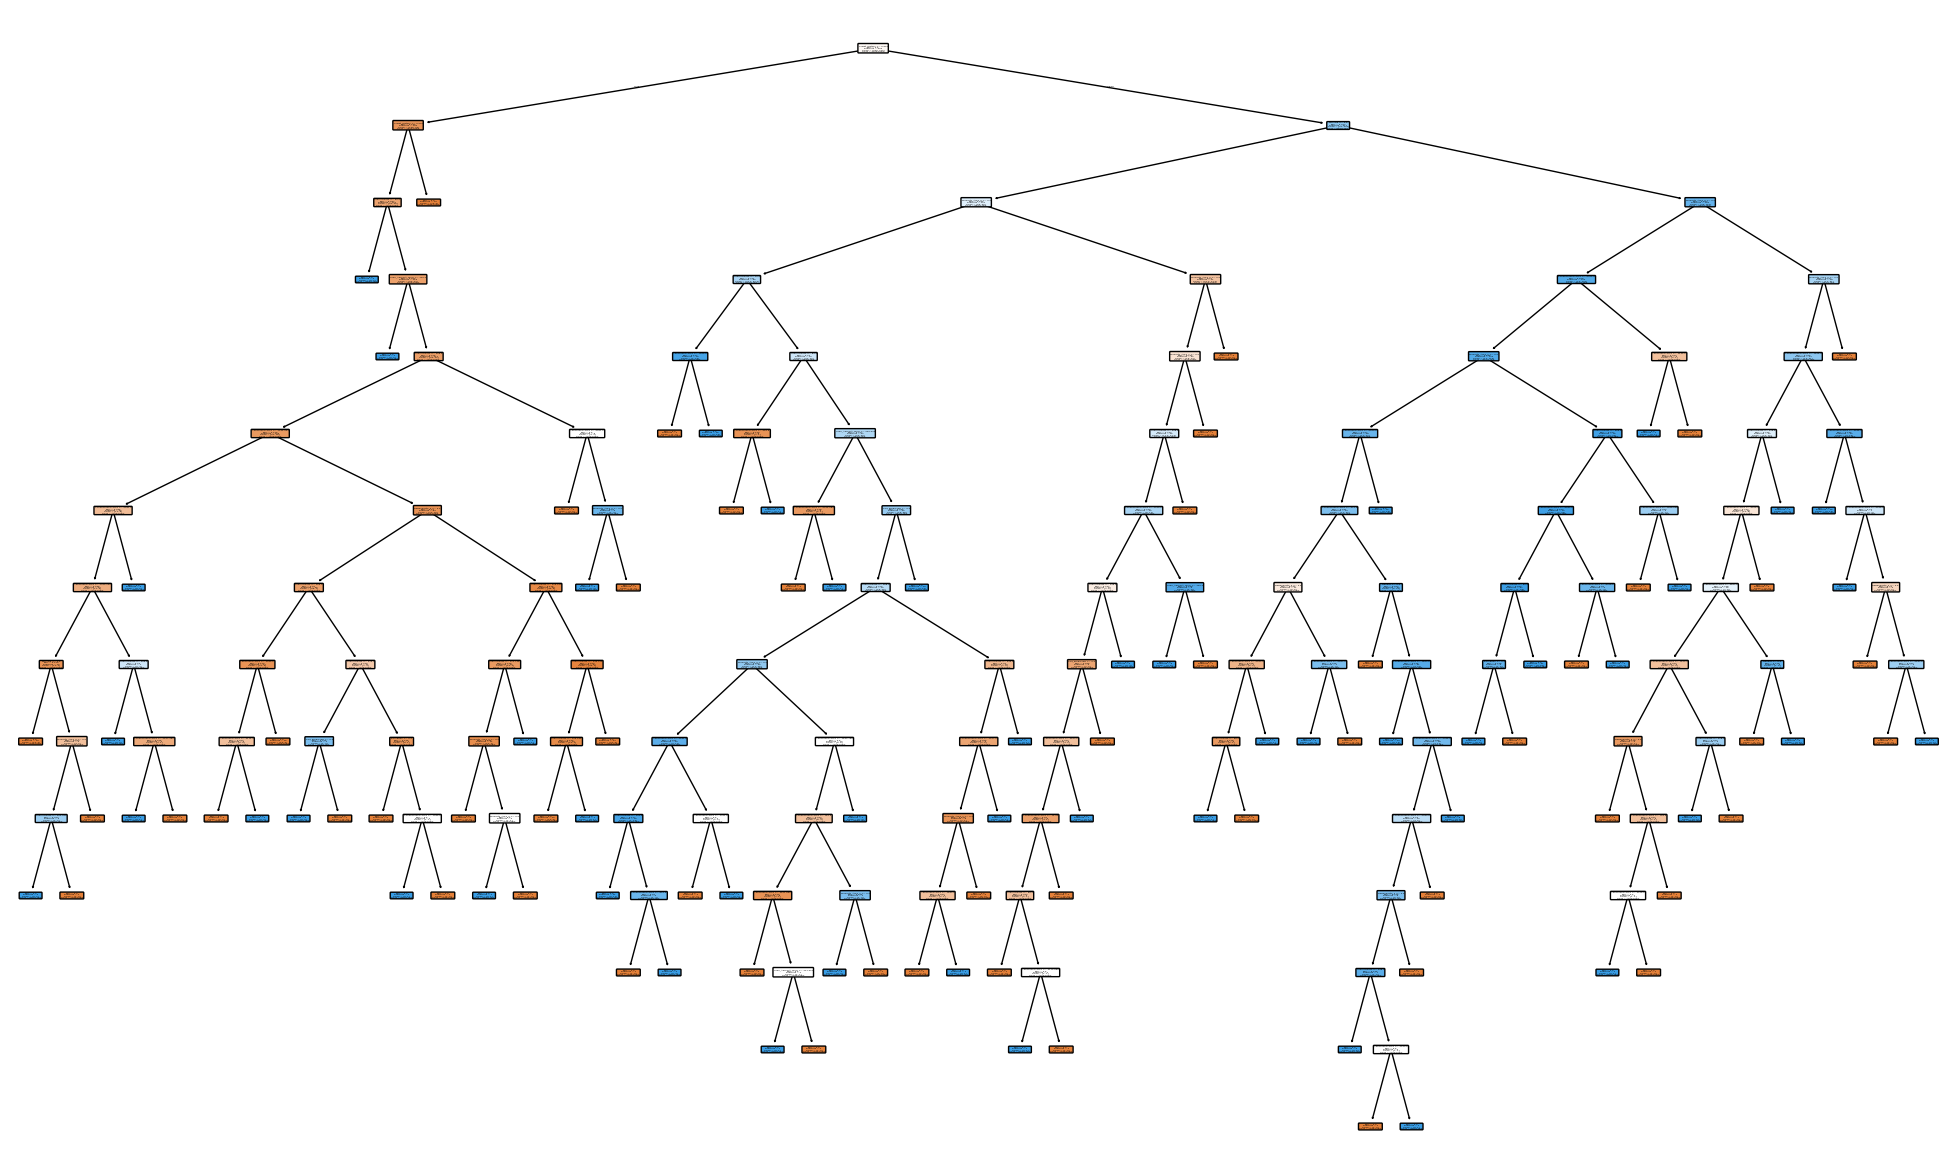

In [ ]:
plt.figure(figsize=(25, 15))
plot_tree(clf_dt,
          filled = True,
          rounded = True,
          class_names=["APPROVED","REJECTED"],
          feature_names=pd.DataFrame(X_train1).columns
          )
plt.show()

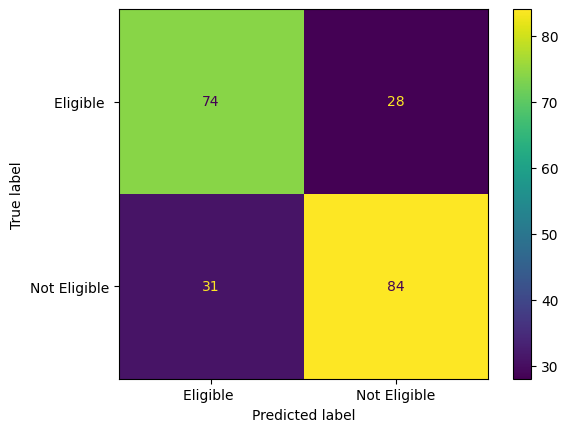

In [ ]:
predictions = clf_dt.predict(X_test1)
cm = confusion_matrix(y_test1, predictions, labels=clf_dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Eligible ","Not Eligible"])
disp.plot()

In [ ]:
#applying cost complexity pruning
path = clf_dt.cost_complexity_pruning_path(X_train1, y_train1)
#want to get alpha values for which we can determine accuracy and can select the best alpha value for ccp
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[ccp_alphas>=0]



<Axes: xlabel='alpha'>

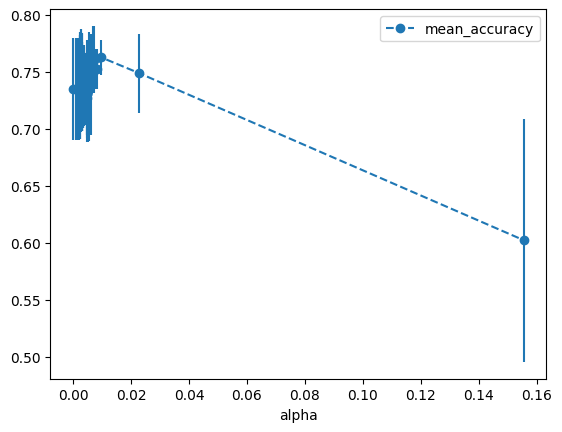

In [ ]:
from sklearn.model_selection import cross_val_score
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state = 0, ccp_alpha=ccp_alpha)
  scores = cross_val_score(clf_dt, X_train1, y_train1, cv=5)
  alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=["alpha","mean_accuracy","std"])
alpha_results.plot(x="alpha",
                   y="mean_accuracy",
                   yerr = "std",
                   marker="o",
                   linestyle="--")

In [ ]:
alpha_results.sort_values(by=["mean_accuracy"], ascending = False).head(7)

,alpha,mean_accuracy,std
51,0.009769,0.762376,0.015339
48,0.007208,0.760396,0.029637
47,0.007020,0.760396,0.029637
50,0.008326,0.752475,0.017711
49,0.007860,0.752475,0.017711
52,0.022890,0.748515,0.034639
26,0.003227,0.742574,0.040096


In [ ]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.009768) & (alpha_results['alpha'] < 0.009780)]['alpha']
ideal_ccp_alpha

,alpha
51,0.009769


In [ ]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.009769177953074304

In [ ]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train1, y_train1)

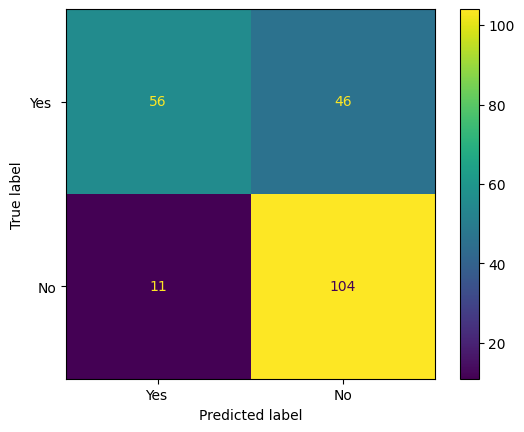

In [ ]:
#getting confusion matrix after ccp
predictions = clf_dt_pruned.predict(X_test1)
cm = confusion_matrix(y_test1, predictions, labels=clf_dt_pruned.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=["Yes ","No"])
disp.plot()

In [ ]:
clf_dt_pruned.score(X_train1,y_train1)

0.7683168316831683

In [ ]:
clf_dt_pruned.score(X_test1,y_test1)

0.7373271889400922

In [ ]:
pd.DataFrame(X_train1).head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_0,Property_Area_1,Property_Area_2
271,1,1,0,1,5818.00,2160.0,184.0,360.0,1.0,True,False,False,False,False,True,False
159,1,1,0,0,2383.00,2138.0,58.0,360.0,0.0,True,False,False,False,True,False,False
356,1,0,0,1,10171.25,0.0,270.0,360.0,1.0,True,False,False,False,False,True,False
401,1,1,0,0,8333.00,0.0,246.0,360.0,1.0,False,False,True,False,False,True,False
78,1,1,0,0,6250.00,5654.0,188.0,180.0,1.0,False,False,True,False,False,True,False


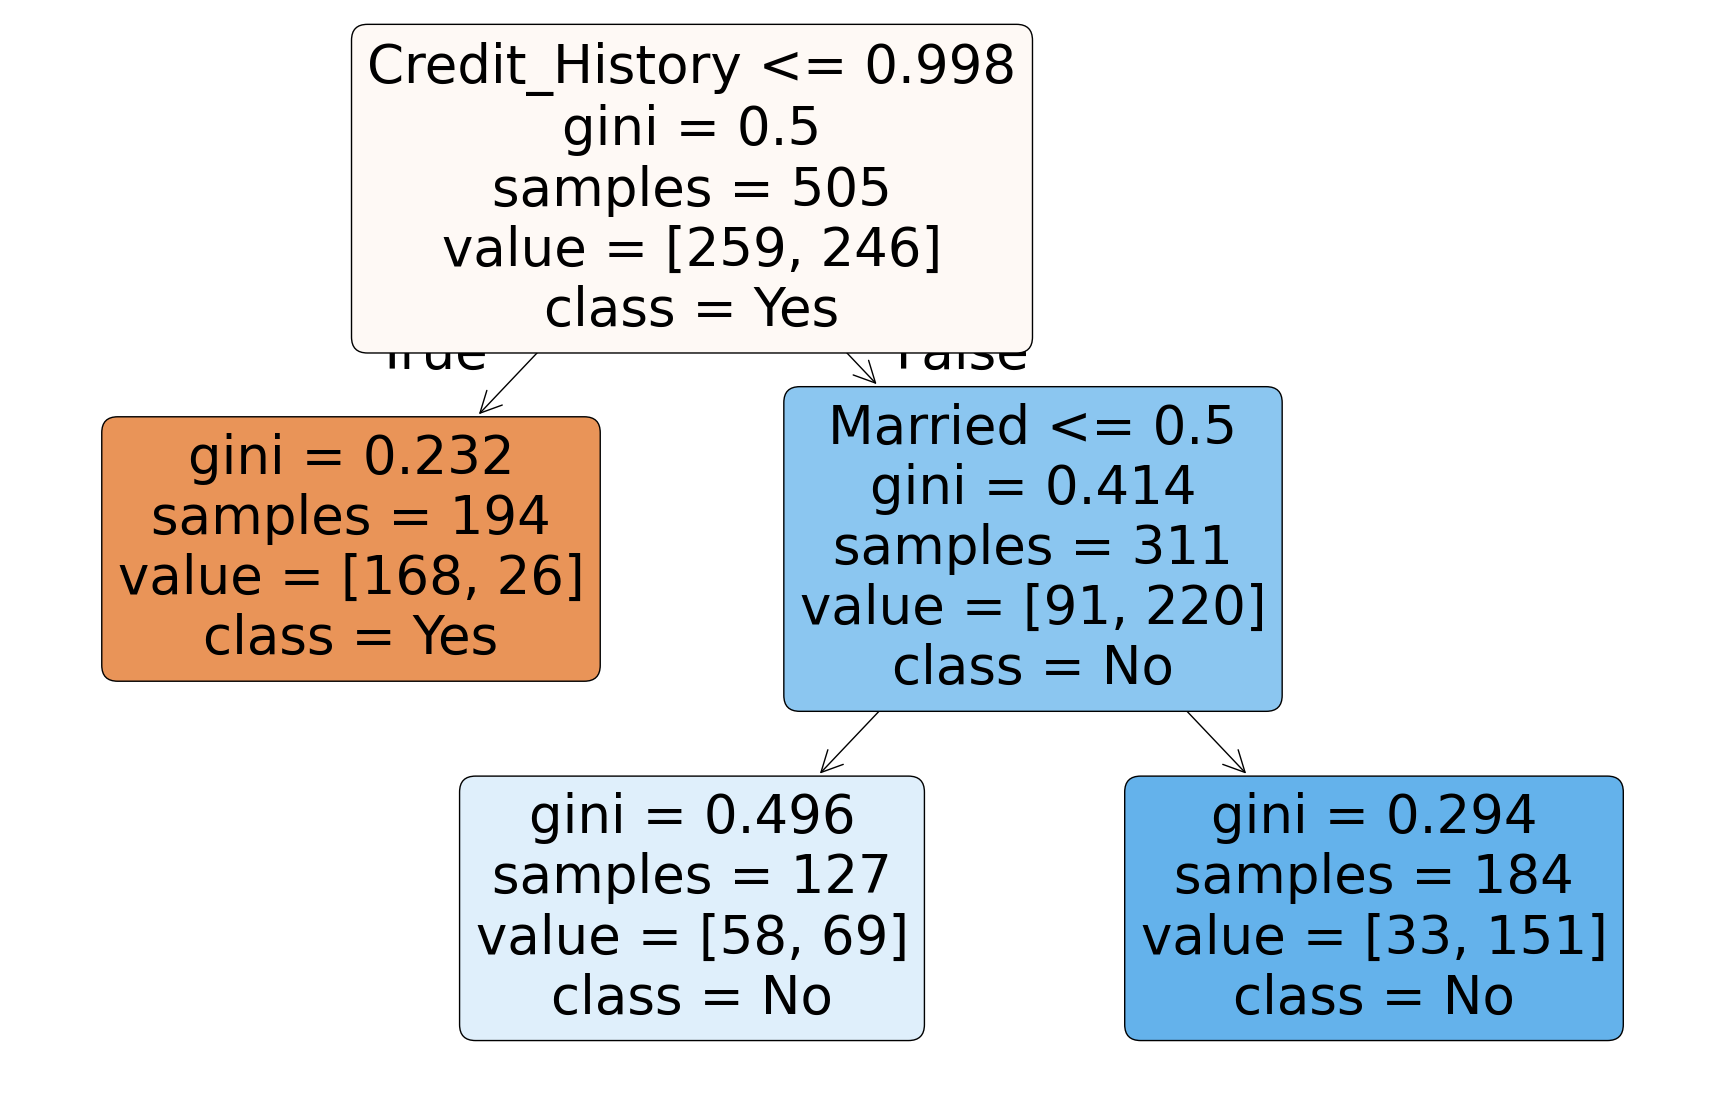

In [ ]:
plt.figure(figsize=(22, 14))
plot_tree(clf_dt_pruned,
          filled = True,
          rounded = True,
          class_names=["Yes","No"],
          feature_names=pd.DataFrame(X_train1).columns
          )
plt.show()

In [ ]:
X_train1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 271 to 684
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             505 non-null    int64  
 1   Married            505 non-null    int64  
 2   Education          505 non-null    int64  
 3   Self_Employed      505 non-null    int64  
 4   ApplicantIncome    505 non-null    float64
 5   CoapplicantIncome  505 non-null    float64
 6   LoanAmount         505 non-null    float64
 7   Loan_Amount_Term   505 non-null    float64
 8   Credit_History     505 non-null    object 
 9   Dependents_0       505 non-null    bool   
 10  Dependents_1       505 non-null    bool   
 11  Dependents_2       505 non-null    bool   
 12  Dependents_3       505 non-null    bool   
 13  Property_Area_0    505 non-null    bool   
 14  Property_Area_1    505 non-null    bool   
 15  Property_Area_2    505 non-null    bool   
dtypes: bool(7), float64(4), int64